## Exploratory Data Analysis

For background on this project, please see the [README](../README.md).

**Notebooks**
- [Data Acquisition & Cleaning](./01_data_acq_clean.ipynb)
- Exploratory Data Analysis (this notebook)
- [Modeling](./03_modeling.ipynb)
- [Results and Recommendations](./04_results.ipynb)

**In this notebook, you'll find (for each of the datasets):**
- Descriptive statistics and distributions
- Visualizations of interesting findings

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as im
import plotly.express as px
import matplotlib.patches as mpatches
import seaborn as sns

---
#### **Airbnb Data**

In [2]:
airbnb = pd.read_csv('../datasets/cleaned_data/airbnb_cleaned.csv')

airbnb.head()

,place,state,neighbourhood,latitude,longitude,room_type,price
0,Asheville,NC,Asheville,35.60670,-82.55563,Entire home/apt,120
1,Asheville,NC,West Asheville,35.57864,-82.59578,Entire home/apt,100
2,Asheville,NC,Weaverville,35.61856,-82.55276,Entire home/apt,134
3,Asheville,NC,Black Mountain,35.61929,-82.48114,Entire home/apt,83
4,Asheville,NC,Weaverville,35.64453,-82.52586,Entire home/apt,289


##### Which cities have the most listings overall?

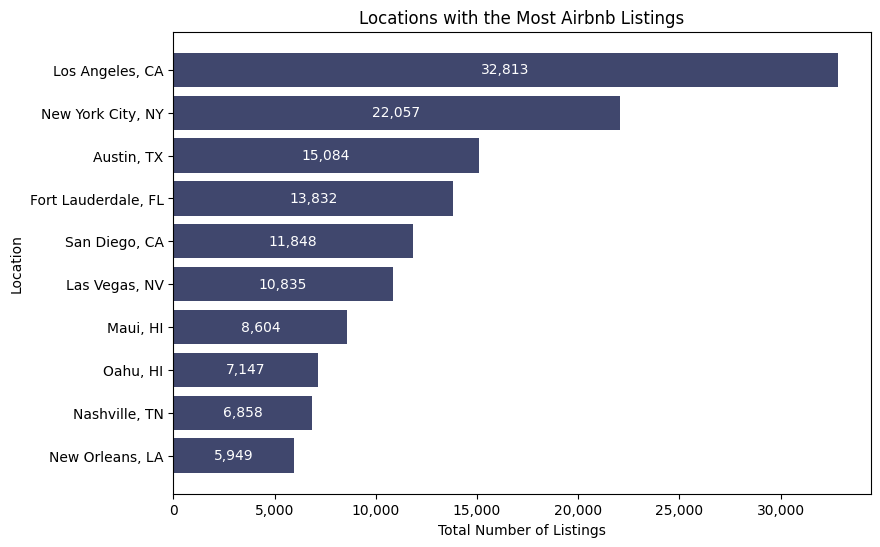

In [3]:
fig, ax = plt.subplots(figsize = (9,6))

city_listing_df = pd.DataFrame(airbnb.groupby(['place', 'state'])['room_type'].count().sort_values(ascending=False).head(10)).reset_index()
city_listing_df['place'] = city_listing_df[['place', 'state']].apply(lambda x: ', '.join(x), axis=1)

city_listings = ax.barh(y = city_listing_df['place'][::-1], width= city_listing_df['room_type'][::-1], color='#40476D')
ax.bar_label(city_listings, labels=[f'{x:,.0f}' for x in city_listings.datavalues], label_type='center', color='white')
ax.set(title='Locations with the Most Airbnb Listings', xlabel='Total Number of Listings', ylabel='Location')
ax.xaxis.set_major_formatter('{x:,.0f}')
plt.show();

- As one would presume, the largest and most tourist-heavy cities have the most listings. Los Angeles and New York City make up more than 25% of all listings in the Airbnb dataset.

- I was not expecting to see Las Vegas on this list, as it seems like more of a hotel-dominated location. However, these counts include the surrounding areas of Las Vegas as well. We find below that the vaguely-named 'unincorporated areas' of Vegas make up a large majority of the area's listings, and the city itself only accounts for 13% of the total rentals.

In [4]:
airbnb[airbnb['place'] == 'Las Vegas']['neighbourhood'].value_counts(normalize=True)

Unincorporated Areas       0.766221
City of Las Vegas          0.130226
City of Henderson          0.058791
City of North Las Vegas    0.036087
City of Mesquite           0.007014
Boulder City               0.001292
Nellis AFB                 0.000369
Name: neighbourhood, dtype: float64

##### How many neighborhood options does each location have?

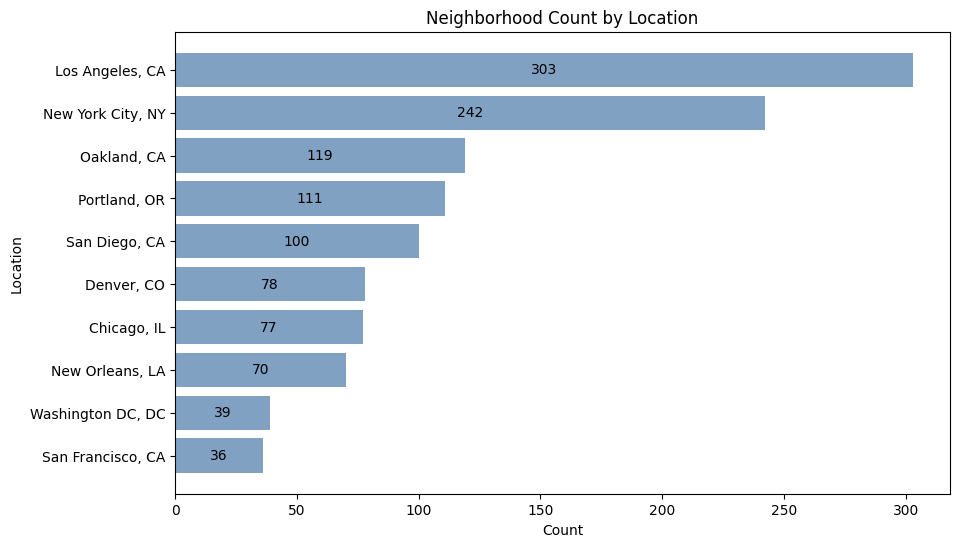

In [5]:
fig, ax = plt.subplots(figsize = (10,6))

nbrd_count_df = pd.DataFrame(airbnb.groupby(['place', 'state'])['neighbourhood'].nunique().sort_values(ascending=False).head(10).reset_index())
nbrd_count_df['place'] = nbrd_count_df[['place', 'state']].apply(lambda x: ', '.join(x), axis=1)

nbrhd_count = ax.barh(y = nbrd_count_df['place'][::-1], width= nbrd_count_df['neighbourhood'][::-1], color='#80A1C1')
ax.bar_label(nbrhd_count, label_type='center')
ax.set(title='Neighborhood Count by Location', xlabel='Count', ylabel='Location')
plt.show();

- We can see that Los Angeles and New York City surpass the other locations by a wide margin, and only four cities have more than 100 neighborhoods to choose from. I'm curious if the cities with more options will be less expensive as there is more supply, or more expensive because these are likely the more-popular travel destinations.

##### What are the most and least expensive locations?

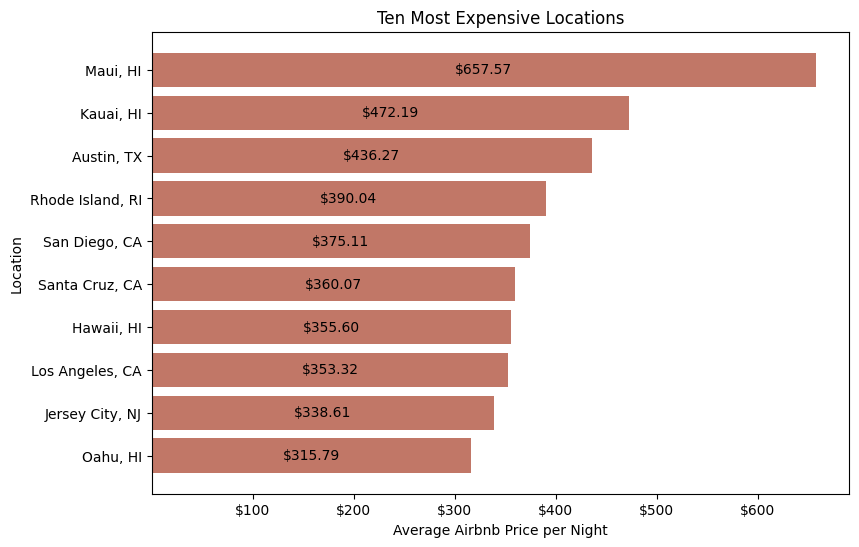

In [6]:
fig, ax = plt.subplots(figsize = (9,6))

most_exp_locs_df = pd.DataFrame(airbnb.pivot_table(index=['place', 'state'], values='price', aggfunc='mean').sort_values(by='price', ascending=False).head(10)).reset_index()
most_exp_locs_df['place'] = most_exp_locs_df[['place', 'state']].apply(lambda x: ', '.join(x), axis=1)
# avg_prices = []
# for num_list in most_exp_locs_df.values.tolist():
#     for val in num_list:
#         avg_prices.append(round(val,2))

most_exp_locs = ax.barh(y = most_exp_locs_df['place'][::-1], width= most_exp_locs_df['price'][::-1], color='#C17767')
ax.bar_label(most_exp_locs, fmt='$%.2f', label_type='center')
ax.set(title='Ten Most Expensive Locations', xlabel='Average Airbnb Price per Night', xticks=[100,200,300,400,500,600], xticklabels=['$100', '$200', '$300', '$400', '$500', '$600'], ylabel='Location')
ax.xaxis.set_tick_params(which='major')
plt.show();

- All four Hawaiian Islands made it on the most expensive list, with a few California additions as well. Somewhat surprisingly, many of the known most expensive US cities (New York City, San Francisco, Washington DC, Boston, Seattle) do not rank in the averaged top ten most expensive Airbnb rentals. 

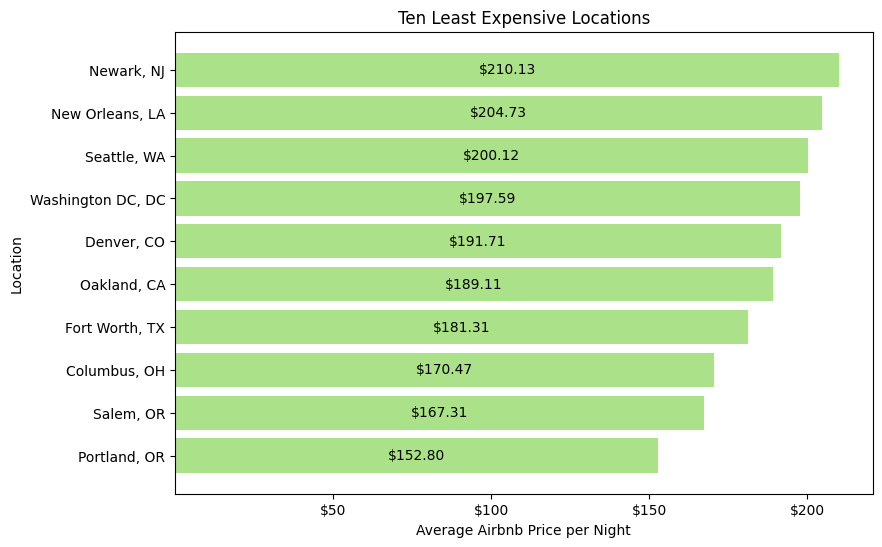

In [7]:
fig, ax = plt.subplots(figsize = (9,6))

least_exp_locs_df = pd.DataFrame(airbnb.pivot_table(index=['place', 'state'], values='price', aggfunc='mean').sort_values(by='price', ascending=False).tail(10)).reset_index()
least_exp_locs_df['place'] = least_exp_locs_df[['place', 'state']].apply(lambda x: ', '.join(x), axis=1)
# avg_prices = []
# for num_list in least_exp_locs_df.values.tolist():
#     for val in num_list:
#         avg_prices.append(round(val,2))

least_exp_locs = ax.barh(y = least_exp_locs_df['place'][::-1], width= least_exp_locs_df['price'][::-1], color='#ABE188')
ax.bar_label(least_exp_locs, fmt='$%.2f', label_type='center')
ax.set(title='Ten Least Expensive Locations', xlabel='Average Airbnb Price per Night', xticks=[50,100,150,200], xticklabels=['$50', '$100', '$150', '$200'], ylabel='Location')
ax.xaxis.set_tick_params(which='major')
plt.show();

- Oregon takes up the two least expensive location ranks, followed by Columbus, OH and Fort Worth, TX. Interestingly, two of the more expensive cities noted above (Seattle and Washington DC) made the list.

##### What are the most and least expensive neighborhoods overall?

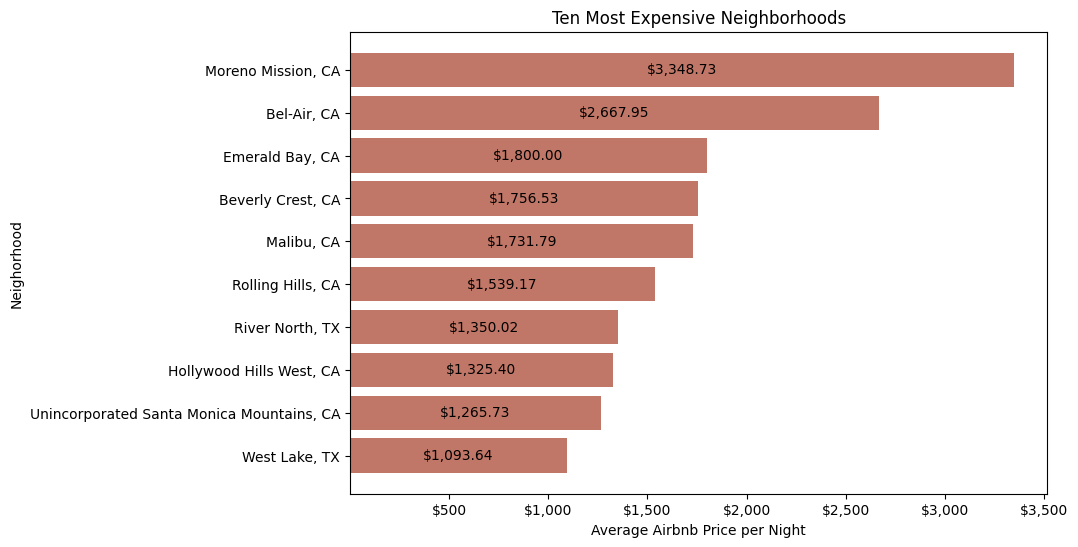

In [8]:
fig, ax = plt.subplots(figsize = (9,6))

most_exp_nbrhds_df = pd.DataFrame(airbnb.pivot_table(index=['neighbourhood', 'state'], values='price', aggfunc='mean').sort_values(by='price', ascending=False).head(10)).reset_index()
most_exp_nbrhds_df['neighbourhood'] = most_exp_nbrhds_df[['neighbourhood', 'state']].apply(lambda x: ', '.join(x), axis=1)

most_exp_nbrhds = ax.barh(y = most_exp_nbrhds_df['neighbourhood'][::-1], width= most_exp_nbrhds_df['price'][::-1], color='#C17767')
# most_exp_locs = ax.barh(y = most_exp_nbrhds_df['neighbourhood'][::-1], width= most_exp_nbrhds_df['price'][::-1], color='#8FE388')
# most_exp_locs = ax.barh(y = most_exp_nbrhds_df['neighbourhood'][::-1], width= most_exp_nbrhds_df['price'][::-1], color='#C2F970')
ax.bar_label(most_exp_nbrhds, labels=[f'${x:,.2f}' for x in most_exp_nbrhds.datavalues], label_type='center')
ax.set(title='Ten Most Expensive Neighborhoods', ylabel='Neighorhood', xlabel='Average Airbnb Price per Night', xticks=[500, 1000, 1500, 2000, 2500, 3000,3500], xticklabels=['$500', '$1,000', '$1,500', '$2,000', '$2,500', '$3,000', '$3,500'])
ax.xaxis.set_tick_params(which='major')
plt.show();

- All of the top ten most expensive neighborhoods are in either Texas or California. Despite Los Angeles ranking only the 8th most expensive location in our prior graph, seven of these ten neighborhoods are located in LA.

- I am also curious to see if these values are being skewed by one or two very expensive listings, or if the median values are close to the means which would indicate that these neighborhoods are about as expensive as they appear.

In [9]:
exp_nbrhds_median_df = pd.DataFrame(airbnb.pivot_table(index=['place', 'neighbourhood', 'state'], values='price', aggfunc='mean').sort_values(by='price', ascending=False).head(10)).reset_index()
exp_nbrhds_median_df.rename(columns={'price': 'avg_price'}, inplace=True)
exp_nbrhds_median_df['median_price'] = [(airbnb[airbnb['neighbourhood'] == nbrhd]['price'].median()) for nbrhd in exp_nbrhds_median_df['neighbourhood']]
exp_nbrhds_median_df['price_diff'] = [val2 for val2 in (val[0] for val in np.diff(exp_nbrhds_median_df[['avg_price', 'median_price']]).tolist())]
exp_nbrhds_median_df['nbrhd_counts'] = [(airbnb[airbnb['neighbourhood'] == nbrhd]['place'].count()) for nbrhd in exp_nbrhds_median_df['neighbourhood']]
exp_nbrhds_median_df

,place,neighbourhood,state,avg_price,median_price,price_diff,nbrhd_counts
0,San Diego,Moreno Mission,CA,3348.730769,271.5,-3077.230769,104
1,Los Angeles,Bel-Air,CA,2667.946429,1689.0,-978.946429,56
2,Los Angeles,Emerald Bay,CA,1800.000000,1900.0,100.000000,3
3,Los Angeles,Beverly Crest,CA,1756.530488,1003.5,-753.030488,164
4,Los Angeles,Malibu,CA,1731.788557,1000.0,-731.788557,402
5,Los Angeles,Rolling Hills,CA,1539.166667,154.0,-1385.166667,6
6,Austin,River North,TX,1350.017544,247.0,-1103.017544,171
7,Los Angeles,Hollywood Hills West,CA,1325.403292,799.5,-525.903292,486
8,Los Angeles,Unincorporated Santa Monica Mountains,CA,1265.730337,556.5,-709.230337,178
9,Austin,West Lake,TX,1093.639073,394.0,-699.639073,302


- From the above, we can see that the median prices for all but one of the neighborhoods are significantly less than the average prices. We can reasonably conclude here that there are a few exorbitantly-priced rentals in these neighborhoods that are shifting the averages up by a wide margin.

- The only neighborhood that did not have a wide negative price difference is Emerald Bay in Los Angeles, CA. However, there are only three listings here so there are fewer observations that we have to measure and analyze.

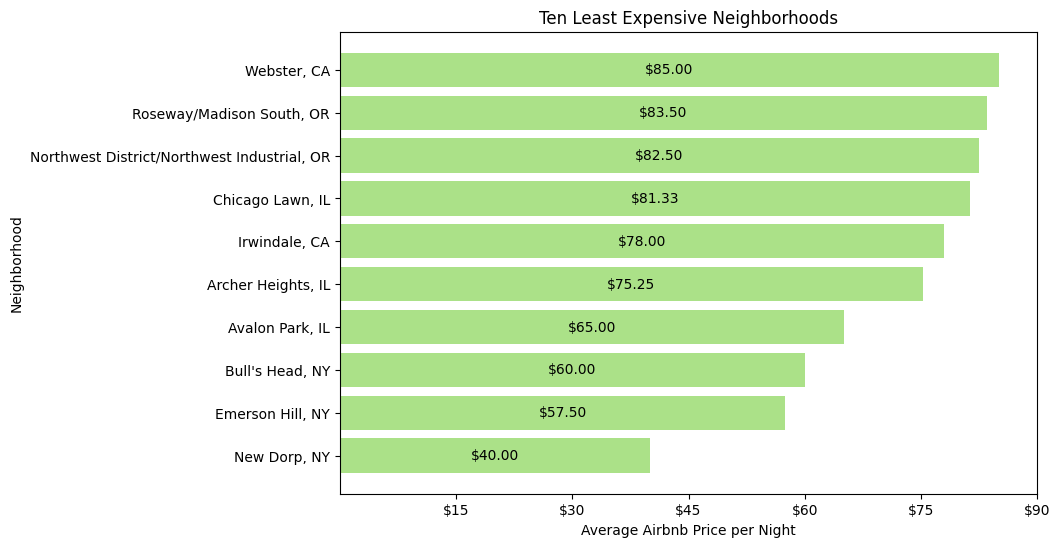

In [10]:
fig, ax = plt.subplots(figsize = (9,6))

least_exp_nbrhds_df = pd.DataFrame(airbnb.pivot_table(index=['place', 'neighbourhood', 'state'], values='price', aggfunc='mean').sort_values(by='price', ascending=False).tail(10)).reset_index()
least_exp_nbrhds_df['neighbourhood'] = least_exp_nbrhds_df[['neighbourhood', 'state']].apply(lambda x: ', '.join(x), axis=1)

least_exp_nbrhds = ax.barh(y = least_exp_nbrhds_df['neighbourhood'][::-1], width= least_exp_nbrhds_df['price'][::-1], color='#ABE188')
ax.bar_label(least_exp_nbrhds, labels=[f'${x:,.2f}' for x in least_exp_nbrhds.datavalues], label_type='center')
ax.set(title='Ten Least Expensive Neighborhoods', ylabel='Neighborhood', xlabel='Average Airbnb Price per Night', xticks=[15, 30, 45, 60, 75, 90], xticklabels=['$15', '$30', '$45', '$60', '$75', '$90'])
ax.xaxis.set_tick_params(which='major')
plt.show();

In [11]:
cheap_nbrhds_median_df = pd.DataFrame(airbnb.pivot_table(index=['place', 'neighbourhood', 'state'], values='price', aggfunc='mean').sort_values(by='price', ascending=False).tail(10)).reset_index()
cheap_nbrhds_median_df.rename(columns={'price': 'avg_price'}, inplace=True)
cheap_nbrhds_median_df['median_price'] = [(airbnb[airbnb['neighbourhood'] == nbrhd]['price'].median()) for nbrhd in cheap_nbrhds_median_df['neighbourhood']]
cheap_nbrhds_median_df['price_diff'] = [val2 for val2 in (val[0] for val in np.diff(cheap_nbrhds_median_df[['avg_price', 'median_price']]).tolist())]
cheap_nbrhds_median_df['nbrhd_counts'] = [(airbnb[airbnb['neighbourhood'] == nbrhd]['place'].count()) for nbrhd in cheap_nbrhds_median_df['neighbourhood']]
cheap_nbrhds_median_df

,place,neighbourhood,state,avg_price,median_price,price_diff,nbrhd_counts
0,Oakland,Webster,CA,85.000000,193.0,108.000000,15
1,Portland,Roseway/Madison South,OR,83.500000,83.5,0.000000,2
2,Portland,Northwest District/Northwest Industrial,OR,82.500000,69.0,-13.500000,4
3,Chicago,Chicago Lawn,IL,81.333333,99.0,17.666667,3
4,Los Angeles,Irwindale,CA,78.000000,89.0,11.000000,3
5,Chicago,Archer Heights,IL,75.250000,79.5,4.250000,4
6,Chicago,Avalon Park,IL,65.000000,65.0,0.000000,1
7,New York City,Bull's Head,NY,60.000000,60.0,0.000000,1
8,New York City,Emerson Hill,NY,57.500000,57.5,0.000000,2
9,New York City,New Dorp,NY,40.000000,40.0,0.000000,1


- For the least expensive neighborhoods, we have a different type of skew where all but one have four listings available or less. In the neighborhood that has 15 rentals, we see a more realistic price in the median.

- We can glean from this that these very cheap values may be representative of the neighborhoods themselves (mainly because many only have one or two listings), but are more than likely not representative of the cities they're located in.

---
#### **Restaurant Data**

In [12]:
food = pd.read_csv('../datasets/cleaned_data/food_cleaned.csv')

food.head()

,restaurantname,cuisine,city,state,lon,lat,frequency,ischain,ischain_y_n
0,Subway,Restaurant,Los Angeles,CA,-117.99910,34.051636,24333,1,Yes
1,Subway,American Deli,San Diego,CA,-117.10059,32.583042,24333,1,Yes
2,Subway,Restaurant,Los Angeles,CA,-118.19185,34.110640,24333,1,Yes
3,Subway,Restaurant,San Mateo,CA,-122.29345,37.532963,24333,1,Yes
4,Subway,Restaurant,Los Angeles,CA,-118.62151,34.495663,24333,1,Yes


##### Which locations have the highest ratios of chain restaurants?

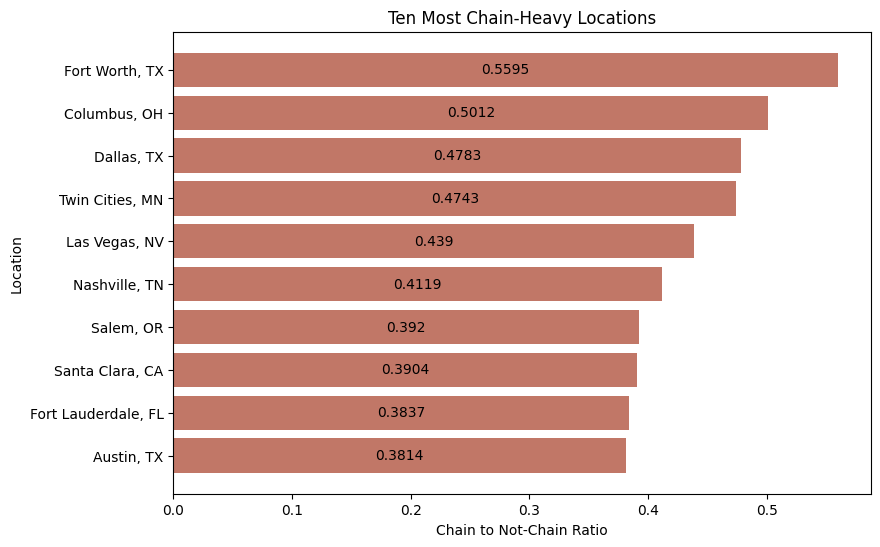

In [13]:
chain_ratios_df = pd.DataFrame(food.pivot_table(index=['city', 'state'], columns='ischain_y_n', values='ischain', aggfunc='count')).reset_index()
chain_ratios_df['city'] = chain_ratios_df[['city', 'state']].apply(lambda x: ', '.join(x), axis=1)
chain_ratios_df['chain_ratio'] = round(chain_ratios_df['Yes'] / (chain_ratios_df['No'] + chain_ratios_df['Yes']), 4)
most_chainy = chain_ratios_df.sort_values('chain_ratio', ascending=False).head(10)

fig, ax = plt.subplots(figsize = (9,6))

high_chain_ratio_plot = ax.barh(y = most_chainy['city'][::-1], width= most_chainy['chain_ratio'][::-1], color='#C17767')
ax.bar_label(high_chain_ratio_plot, label_type='center')
ax.set(title='Ten Most Chain-Heavy Locations', xlabel='Chain to Not-Chain Ratio', ylabel='Location')
plt.show();

- Based on these top ten alone, it looks like there may be a moderately-strong trend of higher chain restaurant ratios in the Southern and Midwest states. All three Texas locations ranked in the top chain-heavy list, as did Florida and Ohio. 

- We do notice a weak presence of the East- and West-coast states like New York, New Jersey, Hawaii, etc. Of the 33 locations included in the food dataset, California is the most represented with seven cities - but only shows up once on the chain-heavy list. 

- Before we can conclude that coastal states (aside from Florida) have less chain restaurants overall, we must first look at the locations that have the lowest chain ratios.

##### Which locations have the lowest ratios of chain restaurants?

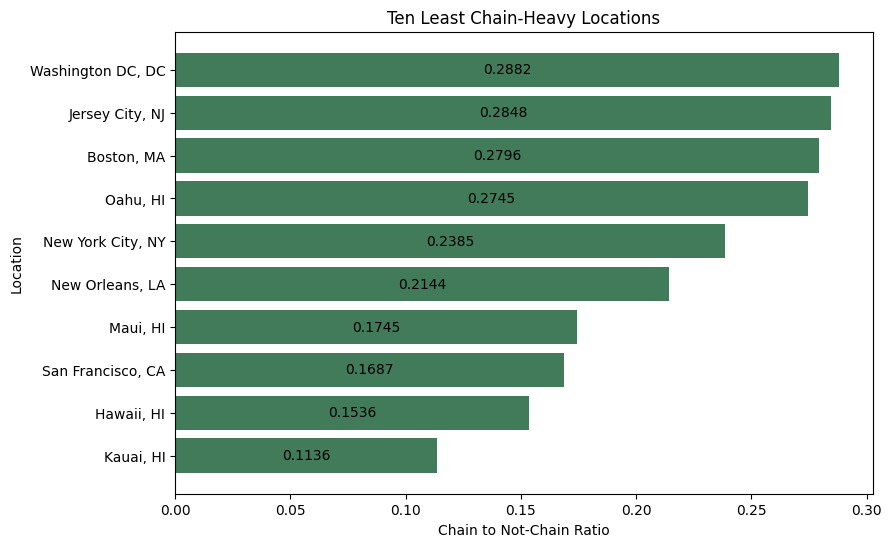

In [14]:
least_chainy = chain_ratios_df.sort_values('chain_ratio', ascending=False).tail(10)

fig, ax = plt.subplots(figsize = (9,6))

low_chain_ratio_plot = ax.barh(y = least_chainy['city'][::-1], width= least_chainy['chain_ratio'][::-1], color='#417B5A')
ax.bar_label(low_chain_ratio_plot, label_type='center')
ax.set(title='Ten Least Chain-Heavy Locations', xlabel='Chain to Not-Chain Ratio', ylabel='Location')
plt.show();

- We immediately notice that all four Hawaiian Islands rank on our list as less chain-heavy. We also see more of the East- and West- coast places like NYC, NJ, and DC.

- Again, California is not a huge presence here. This means that aside from Santa Clara and San Francisco, the other CA cities fall somewhere in the middle of the chain ratio spectrum.

- Finally, if we look back to our previous graph, we find that the difference in the highest not-chain-heavy ratio and the lowest chain-heavy ratio is only about 10%. So the 13 other locations that were not on either list fall somewhere between 28% and 38%.

In [15]:
# Plotting on a choropleth map to view all locations together, aggregated by state mean

chain_rank_by_state = pd.DataFrame(chain_ratios_df.pivot_table(index='state', values='chain_ratio', aggfunc='mean')).reset_index()

chain_ratio_us = px.choropleth(chain_rank_by_state, locations='state',
            locationmode='USA-states',
            scope='usa',
            color='chain_ratio',
            color_continuous_scale='rdylbu',
            labels={'chain_ratio':'Chain to Not-Chain Ratio'}
            )

chain_ratio_us.show()

- We do lose some interpretability in this map, given that, 1) we do not have data on all states in the US to compare to, and 2) many of these states only have one city to represent the base ratio while others have three, four, or five cities' worth of data.

- As always in data science, more data would be better here. That said, if we're looking at the map from a general perspective, we can see that as a whole, the states that have a greater chain ratio (indicated in blue for >mean chain ratio) are mostly grouped in the center of the map and those that have a lower chain ratio (indicated in red/orange) are spread more along the coasts. 

##### What are the most common chains seen in all locations?

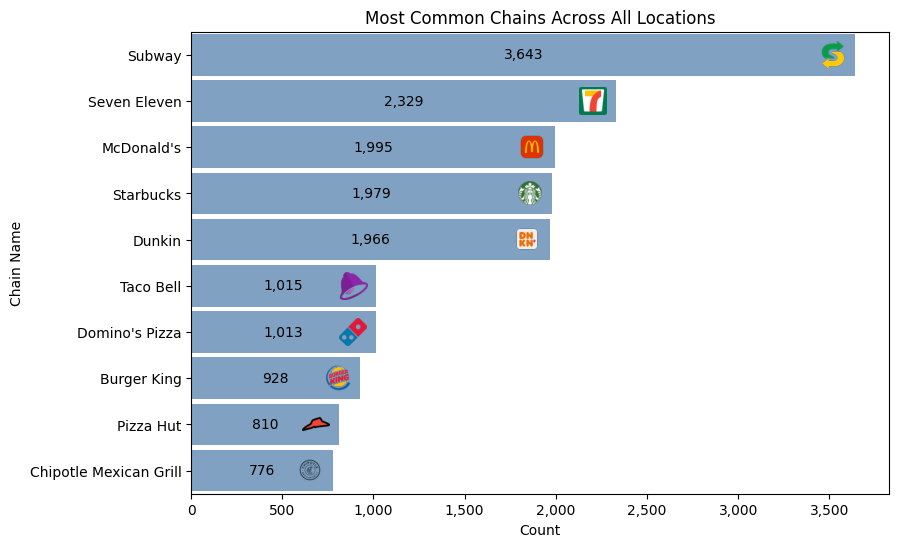

In [16]:
common_chains = pd.DataFrame(food['restaurantname'].value_counts().head(10)).reset_index()

fig, ax = plt.subplots(figsize = (9,6))

height = 0.9
common_chains_plot = ax.barh(y = common_chains['index'][::-1], width= common_chains['restaurantname'][::-1], height = height, color='#80A1C1')
ax.bar_label(common_chains_plot, labels=[f'{x:,.0f}' for x in common_chains['restaurantname'][::-1]], label_type='center')
for i, (rest_name, rest_count) in enumerate(zip(common_chains['index'][::-1], common_chains['restaurantname'][::-1])):
    img_dir = f"../images/logos/{rest_name}.png"
    img = plt.imread(img_dir)
    plt.imshow(img, aspect = 'auto', extent=[rest_count - 200, rest_count-50, i - height / 3, i + height / 3], zorder=2)
ax.set(title='Most Common Chains Across All Locations', xlabel='Count', ylabel='Chain Name')
ax.xaxis.set_major_formatter('{x:,.0f}')
plt.xlim(0, common_chains['restaurantname'].max() * 1.05)
plt.ylim(-0.5, len(common_chains) - 0.5)
plt.show();

# Restaurant logos courtesy of: https://icons8.com/

##### What are the most common chains in the high-chain ratio locations?

In [17]:
most_chainy['top_chain'] = [food[food['city'] == city[:-4]]['restaurantname'].mode()[0] for city in most_chainy['city']]
most_chainy.drop(columns=['state']).reset_index(drop=True)

ischain_y_n,city,No,Yes,chain_ratio,top_chain
0,"Fort Worth, TX",1874,2380,0.5595,Subway
1,"Columbus, OH",1441,1448,0.5012,Subway
2,"Dallas, TX",3040,2787,0.4783,Seven Eleven
3,"Twin Cities, MN",2912,2627,0.4743,Subway
4,"Las Vegas, NV",2826,2211,0.4390,Seven Eleven
5,"Nashville, TN",1342,940,0.4119,Subway
6,"Salem, OR",442,285,0.3920,Subway
7,"Santa Clara, CA",2737,1753,0.3904,Subway
8,"Fort Lauderdale, FL",2883,1795,0.3837,Subway
9,"Austin, TX",2173,1340,0.3814,Seven Eleven


- I'd originally thought to plot this, but we can see above that Subway and 7/11 are the only two chains that are most common in all high-chain locations, which would not make for a very interesting visualization.

##### What are the most common cuisines in all locations?

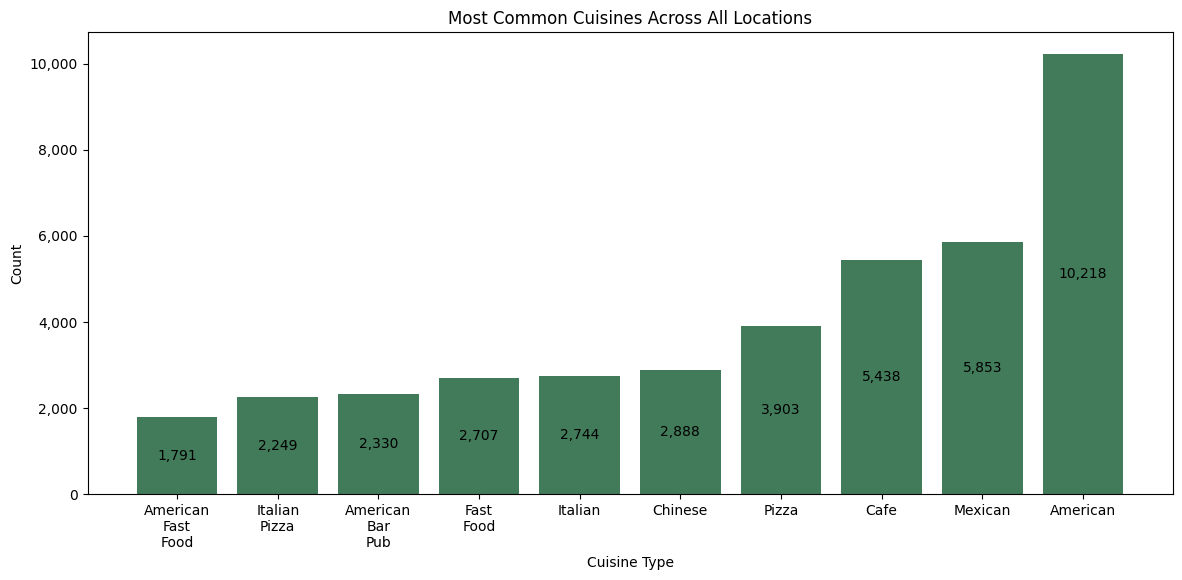

In [18]:
common_cuisines = pd.DataFrame(food[food['cuisine'] != 'Restaurant']['cuisine'].value_counts().head(10)).reset_index()

fig, ax = plt.subplots(figsize = (14,6))

common_cuisines_plot = ax.bar(x= common_cuisines['index'][::-1], height= common_cuisines['cuisine'][::-1], color='#417B5A')
ax.bar_label(common_cuisines_plot, labels=[f'{x:,.0f}' for x in common_cuisines['cuisine'][::-1]], label_type='center')
ax.set(title='Most Common Cuisines Across All Locations', xlabel='Cuisine Type', ylabel='Count', xticks=list(range(len(common_cuisines['index']))), xticklabels=[cuisine.replace(' ', '\n') for cuisine in common_cuisines['index'][::-1]])
ax.yaxis.set_major_formatter('{x:,.0f}')
plt.show();

- Because almost 60,000 of the cuisine types were noted as 'Restaurant,' we filtered those out and found that American is the cuisine seen most frequently across all of the locations. 

- It's important to note that there are 8,149 unique cuisine types in the food df, meaning that the more specific types will usually be buried by the more generally-named types, as seen above.

##### What is the most common cuisine in each location?

In [19]:
comm_cuisine_by_city = pd.DataFrame(columns=('city', 'state', 'most_common_cuisine'))

for city in food['city'].unique():
    comm_cuisine = food[(food['city'] == city) & (food['cuisine'] != 'Restaurant')]['cuisine'].mode()[0]
    city_state = food[food['city'] == city]['state'].unique()[0]
    temp_list = [city, city_state, comm_cuisine]
    comm_cuisine_by_city.loc[len(comm_cuisine_by_city)] = temp_list

comm_cuisine_by_city

,city,state,most_common_cuisine
0,Los Angeles,CA,American
1,San Diego,CA,Mexican
2,San Mateo,CA,American
3,San Francisco,CA,Cafe
4,Oakland,CA,American
5,Santa Clara,CA,American
6,Santa Cruz,CA,American
7,Denver,CO,American
8,Washington DC,DC,American
9,Fort Lauderdale,FL,American


A few thoughts on the above:
- I'd posit that we may not be able to use cuisine-type preference as a user-input value when making recommendations, because many cities have the same top one, two, or three cuisine types.

- Though the definition of a chain is that there are a lot of them, I was surprised by the lack of distinction in chains and cuisines in each of the states. 

---
#### **Cost of Living**

In [20]:
coli = pd.read_csv('../datasets/cleaned_data/coli_cleaned.csv')

coli.head()

,name,state,cost_of_living,grocery_cost_idx,transportation_cost_idx,miscellaneous_cost_idx,population,median_age,summer_comfort_index,winter_comfort_index,perc_growth_since_2020,political_left_lean,political_right_lean
0,Asheville,NC,105.7,103.1,82.8,111.2,92852,38.6,8.5,6.0,0.090,0.597,0.386
1,Austin,TX,129.4,96.7,109.9,105.9,995484,32.7,3.7,7.9,0.200,0.714,0.264
2,Boston,MA,153.4,111.4,131.8,157.9,691531,32.0,9.1,4.9,0.110,0.806,0.175
3,Cambridge,MA,173.7,115.5,95.7,176.7,119192,30.4,9.2,4.8,0.071,0.715,0.263
4,Chicago,IL,107.4,97.2,138.5,139.8,2677643,34.1,9.0,4.7,0.007,0.742,0.240


*Note: These values are aggregated measures of county data i.e. 'New York City' is the average of Bronx County, Kings County, New York County, Queens County, and Richmond County.*

##### Which locations have the highest cost of living indices? 

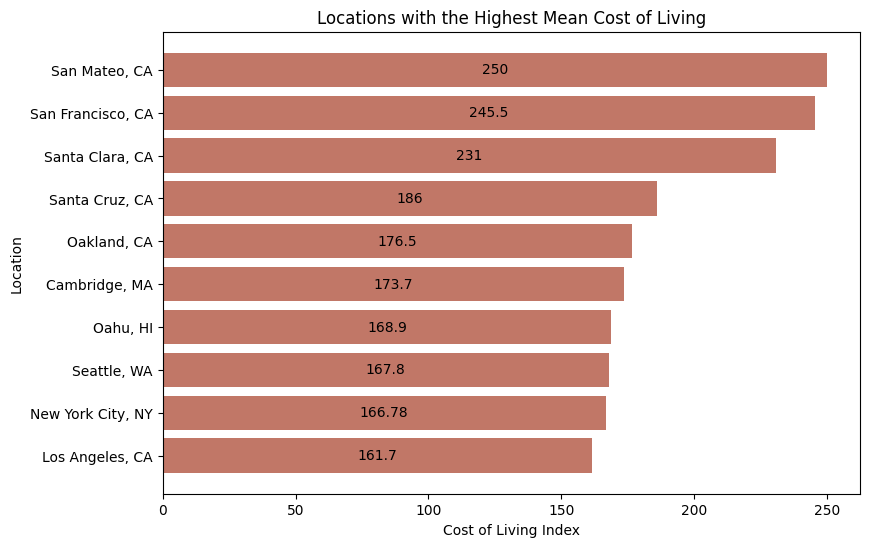

In [21]:
high_coli = coli.sort_values('cost_of_living', ascending=False).head(10)
high_coli['name'] = high_coli[['name', 'state']].apply(lambda x: ', '.join(x), axis=1)

fig, ax = plt.subplots(figsize = (9,6))

high_coli_plot = ax.barh(y = high_coli['name'][::-1], width= high_coli['cost_of_living'][::-1], color='#C17767')
ax.bar_label(high_coli_plot, label_type='center')
ax.set(title='Locations with the Highest Mean Cost of Living', xlabel='Cost of Living Index', ylabel='Location')
plt.show();

- All Northern California locations on our list are in the top five greatest cost of living slots.

- All of the locations seen above are West or East coast cities. 

##### Which locations have the lowest cost of living indices? 

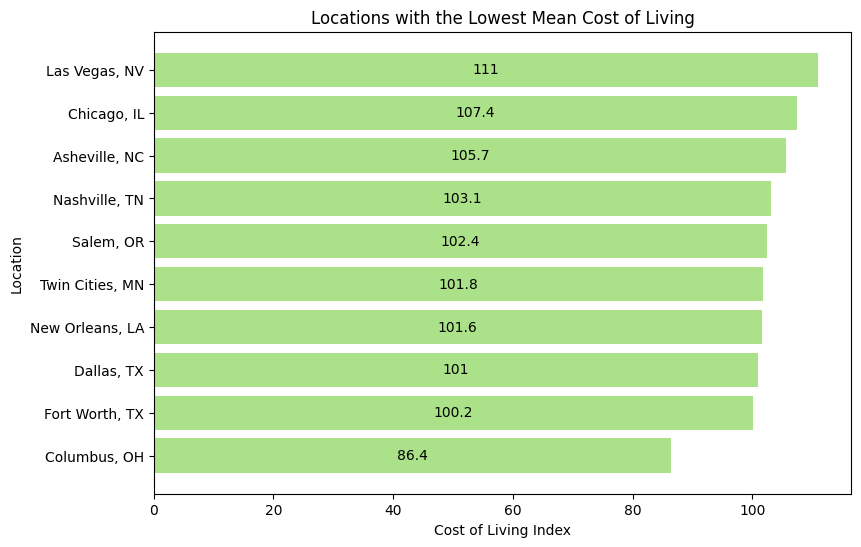

In [22]:
low_coli = coli.sort_values('cost_of_living', ascending=False).tail(10)
low_coli['name'] = low_coli[['name', 'state']].apply(lambda x: ', '.join(x), axis=1)

fig, ax = plt.subplots(figsize = (9,6))

low_coli_plot = ax.barh(y = low_coli['name'][::-1], width= low_coli['cost_of_living'][::-1], color='#ABE188')
ax.bar_label(low_coli_plot, label_type='center')
ax.set(title='Locations with the Lowest Mean Cost of Living', xlabel='Cost of Living Index', ylabel='Location')
plt.show();

- Columbus, OH is the only location on our list with a cost of living less than the 100.0 US average. 

- We are seeing somewhat of a similar location pattern to our restaurant data, where the Midwest and Southern states tend to group together, and the coastal states are in a separate group on the opposite end of the spectrum. 

##### Is there a correlation between high cost of living and a left-skewed political lean? 

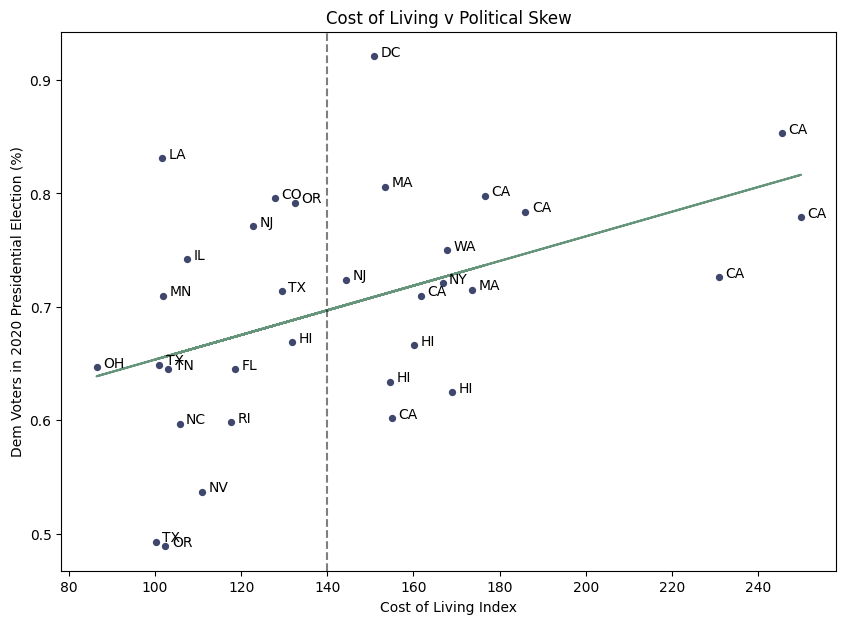

In [23]:
fig, ax = plt.subplots(figsize = (10,7))

# Adding points
ax.scatter(coli['cost_of_living'], coli['political_left_lean'], s=18, c='#40476D')

# Adding state abbreviation annotations
for i, (col, pol, state) in enumerate(zip(coli['cost_of_living'], coli['political_left_lean'], coli['state'])):
    ax.annotate(state, (col +1.5, pol))

# Plot titles and labeling
ax.set(title='Cost of Living v Political Skew', xlabel='Cost of Living Index', ylabel='Dem Voters in 2020 Presidential Election (%)')

# Plotting trendline
z = np.polyfit(coli['cost_of_living'], coli['political_left_lean'], 1)
p = np.poly1d(z)
plt.plot(coli['cost_of_living'], p(coli['cost_of_living']), color= '#417B5A', alpha=0.8)

# Plotting vertical line
plt.axvline(x=140, color = 'black', linestyle='dashed', alpha=0.5)

plt.show();

- While there are a few outliers (Lousiana, DC), we are again having the same states show up in the same groups. The vertical line plotted at the 140 cost of living index highlights these clusters, as we can see clearly that the right side of the line contains the Western and Northeastern states, while the left side contains mostly Midwestern and Southeastern states.

- This brings up an important point about the connections between seemingly unrelated variables. Noted by the creators of the chain data, a greater number of independent restaurants is associated with more dense but pedestrian-friendly environments, highly-educated populations, wealthier populations, more racially diverse areas, and more tourist-heavy locations.

---
#### **Weather**

In [24]:
weather = pd.read_csv('../datasets/cleaned_data/weather_combined.csv')

weather.head()

,place,state,jan_avg_temp,feb_avg_temp,march_avg_temp,april_avg_temp,may_avg_temp,june_avg_temp,july_avg_temp,aug_avg_temp,...,nov_avg_rain,dec_avg_rain,winter_avg_temp,spring_avg_temp,summer_avg_temp,autumn_avg_temp,winter_avg_rain,spring_avg_rain,summer_avg_rain,autumn_avg_rain
0,Asheville,NC,36.6,37.6,48.8,51.8,59.4,68.1,71.0,71.5,...,3.11,3.69,40.166667,53.333333,70.200000,55.333333,3.710000,4.160000,4.713333,3.423333
1,Austin,TX,51.4,46.5,62.6,66.7,73.0,81.2,82.0,83.8,...,2.52,2.42,53.400000,67.433333,82.333333,70.366667,2.243333,3.256667,2.386667,3.026667
2,Boston,MA,31.2,30.1,40.9,49.0,59.2,71.7,70.4,74.6,...,4.04,4.01,33.100000,49.700000,72.233333,56.000000,3.810000,3.790000,3.463333,3.703333
3,Cambridge,MA,29.6,27.5,39.4,48.8,59.3,71.1,70.0,73.8,...,4.00,3.85,31.100000,49.166667,71.633333,54.533333,3.570000,3.706667,3.523333,3.676667
4,Chicago,IL,28.4,18.9,43.1,50.6,58.8,72.8,73.4,75.6,...,2.44,2.04,28.133333,50.833333,73.933333,55.766667,1.760000,3.223333,3.643333,2.853333


##### Which locations are the warmest, on average?

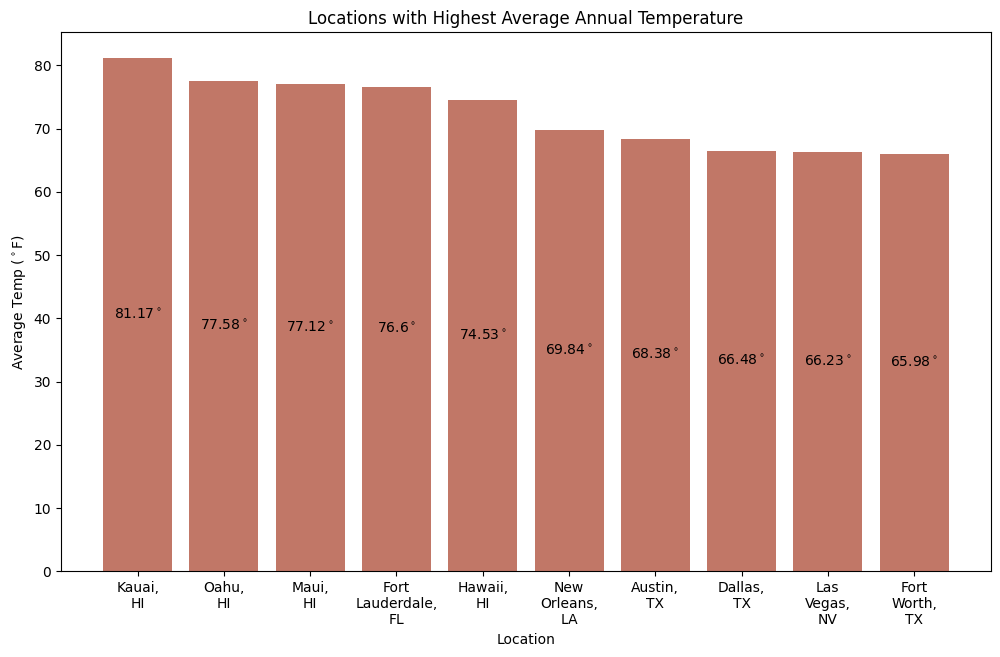

In [25]:
annual_temp_df = pd.DataFrame(columns=('place', 'state', 'avg_annual_temp'))

for i, (avg_temp, place, state) in enumerate(sorted(list(zip(weather.iloc[:, 2:14].mean(axis=1), weather['place'], weather['state'])),reverse=True)):
    avg_temp_list = [place, state, avg_temp]
    annual_temp_df.loc[len(annual_temp_df)] = avg_temp_list
annual_temp_df['place'] = annual_temp_df[['place', 'state']].apply(lambda x: ', '.join(x), axis=1)

fig, ax = plt.subplots(figsize = (12,7))

warm_plot = ax.bar(x=annual_temp_df['place'][:10], height=annual_temp_df['avg_annual_temp'][:10], color= '#C17767')
ax.bar_label(warm_plot, labels=[(str(round(degrees, 2)) + '$^\circ$') for degrees in annual_temp_df['avg_annual_temp'][:10]], label_type='center')
ax.set(title='Locations with Highest Average Annual Temperature', xlabel='Location', ylabel='Average Temp ($^\circ$F)', xticks=list(range(10)), xticklabels=[x.replace(' ', '\n') for x in annual_temp_df['place'][:10]])
plt.show();

- All four Hawaiian Islands and three Texas locations ranked high on the list of average annual temperature, though, we'd theorize, for different reasons. 

- This is a very broad view of relative warmth in each place - Hawaii's temperature consistently sits around the 70&deg;s to 80&deg;s range, with some variance, of course. Texas, however, can get cold, but can also be very hot, which averages out to about the 60&deg;s to 70&deg;s range, as seen above.

##### Which locations are the coldest, on average?

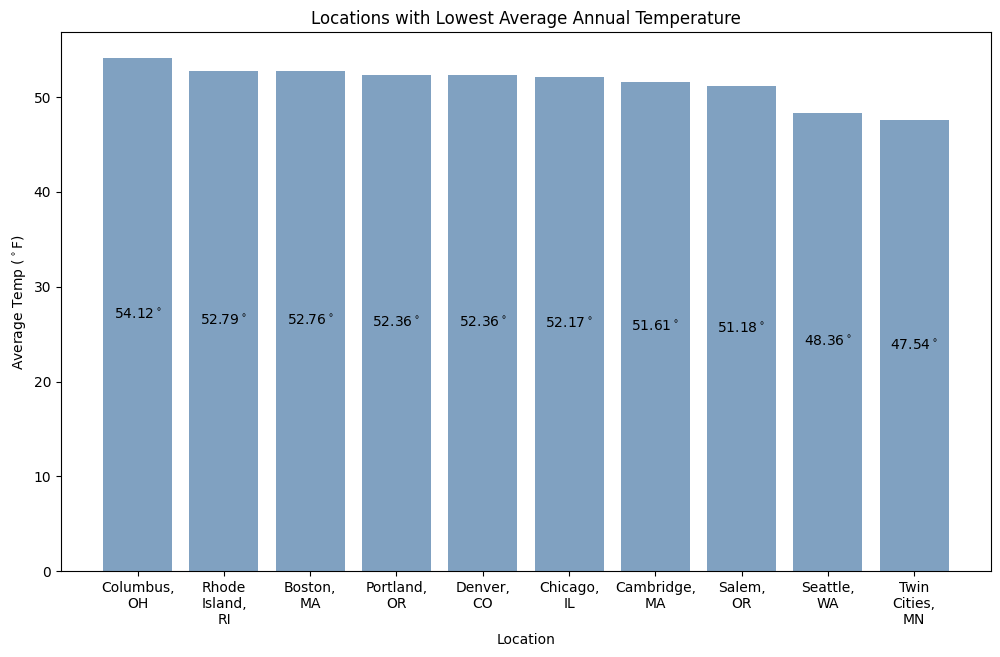

In [26]:
fig, ax = plt.subplots(figsize = (12,7))

cold_plot = ax.bar(x=annual_temp_df['place'][-10:], height=annual_temp_df['avg_annual_temp'][-10:], color= '#80A1C1')
ax.bar_label(cold_plot, labels=[(str(round(degrees, 2)) + '$^\circ$') for degrees in annual_temp_df['avg_annual_temp'][-10:]], label_type='center')
ax.set(title='Locations with Lowest Average Annual Temperature', xlabel='Location', ylabel='Average Temp ($^\circ$F)', xticks=list(range(10)), xticklabels=[x.replace(' ', '\n') for x in annual_temp_df['place'][-10:]])
plt.show();

- 

##### Which locations see the most rain annually?

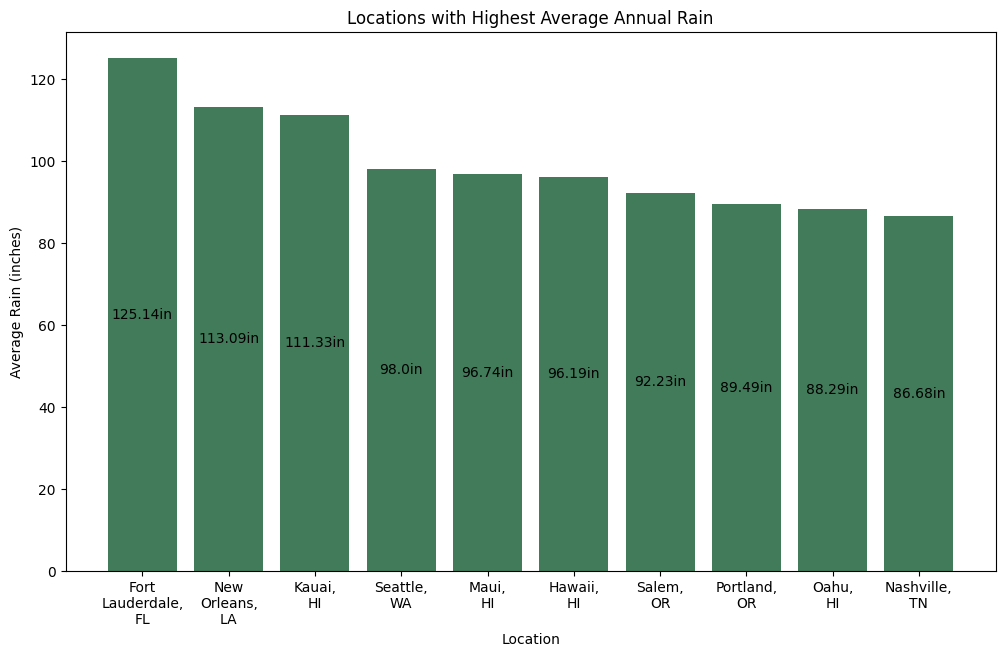

In [27]:
annual_rain_df = pd.DataFrame(columns=('place', 'state', 'tot_rain'))

for i, (tot_rain, place, state) in enumerate(sorted(list(zip(weather.iloc[:, 15:27].sum(axis=1), weather['place'], weather['state'])),reverse=True)):
    avg_rain_temp_list = [place, state, tot_rain]
    annual_rain_df.loc[len(annual_rain_df)] = avg_rain_temp_list
annual_rain_df['place'] = annual_rain_df[['place', 'state']].apply(lambda x: ', '.join(x), axis=1)

fig, ax = plt.subplots(figsize = (12,7))

rain_plot = ax.bar(x=annual_rain_df['place'][:10], height=annual_rain_df['tot_rain'][:10], color= '#417B5A')
ax.bar_label(rain_plot, labels=[(str(round(inches, 2)) + 'in') for inches in annual_rain_df['tot_rain'][:10]], label_type='center')
ax.set(title='Locations with Highest Average Annual Rain', xlabel='Location', ylabel='Average Rain (inches)', xticks=list(range(10)), xticklabels=[x.replace(' ', '\n') for x in annual_rain_df['place'][:10]])
plt.show();

- To no one's surprise, the Pacific Northwest and Southeastern US regions topped our list of the most rain annually, on average.

##### Which locations see the least rain annually?

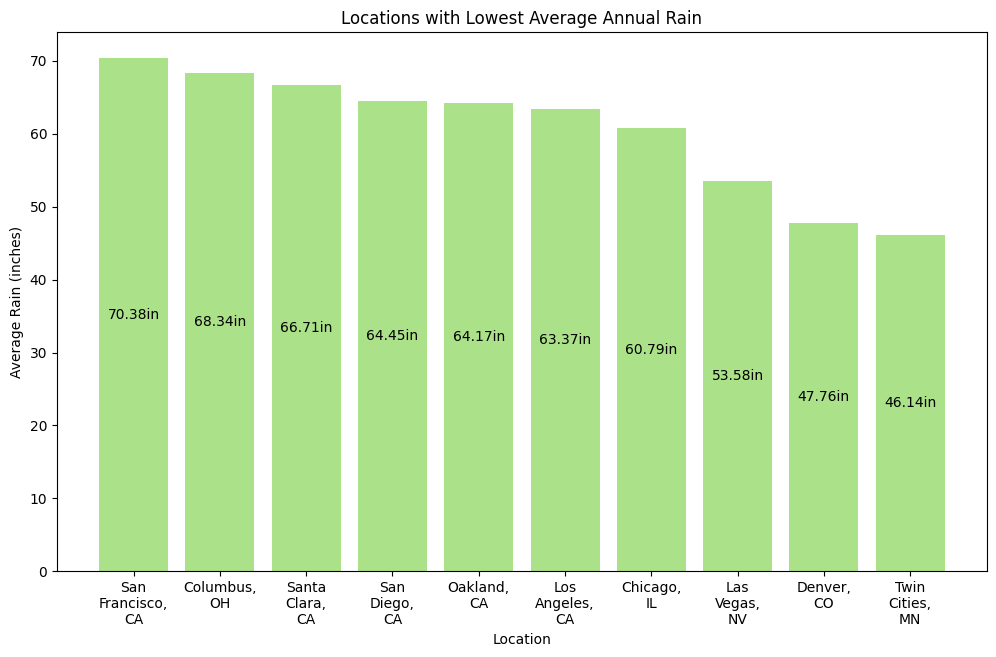

In [28]:
fig, ax = plt.subplots(figsize = (12,7))

less_rain_plot = ax.bar(x=annual_rain_df['place'][-10:], height=annual_rain_df['tot_rain'][-10:], color= '#ABE188')
ax.bar_label(less_rain_plot, labels=[(str(round(inches, 2)) + 'in') for inches in annual_rain_df['tot_rain'][-10:]], label_type='center')
ax.set(title='Locations with Lowest Average Annual Rain', xlabel='Location', ylabel='Average Rain (inches)', xticks=list(range(10)), xticklabels=[x.replace(' ', '\n') for x in annual_rain_df['place'][-10:]])
plt.show();

- I was expecting to see all of the Hawaiian Islands at the top of the average annual rain rankings, and needed to double-check when three of them showed up on the less-rainy list. According to [this site](https://www.currentresults.com/Weather/Hawaii/yearly-rainfall.php), some areas on each island are very rainy while others receive much less rain, so the overall averages may not be as high other US cities.

##### Can we use the average temperatures and comfort indices to determine where the best places are to spend summer and winter?

In [29]:
sum_win_idx_temps = pd.concat([
    weather['place'], weather['state'], 
    coli.sort_values('name')['summer_comfort_index'].reset_index(drop=True), 
    weather['summer_avg_temp'], 
    coli.sort_values('name')['winter_comfort_index'].reset_index(drop=True), 
    weather['winter_avg_temp']], 
    axis=1, join='outer')
sum_win_idx_temps['place'] = sum_win_idx_temps[['place', 'state']].apply(lambda x: ', '.join(x), axis=1)

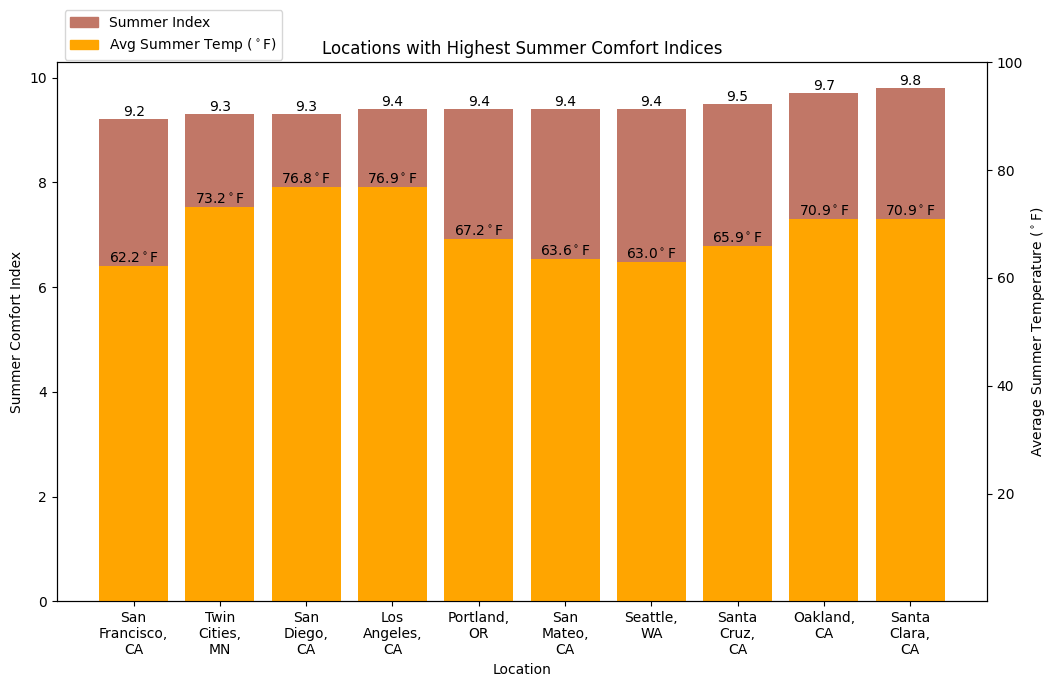

In [30]:
fig, ax = plt.subplots(figsize = (12,7))

summer_idx_plot = ax.bar(x=sum_win_idx_temps.sort_values('summer_comfort_index')['place'][-10:], height=sum_win_idx_temps.sort_values('summer_comfort_index')['summer_comfort_index'][-10:], color= '#C17767')
ax.bar_label(summer_idx_plot, labels=[round(score, 2) for score in sum_win_idx_temps.sort_values('summer_comfort_index')['summer_comfort_index'][-10:]], label_type='edge')
ax.set(title='Locations with Highest Summer Comfort Indices', xlabel='Location', ylabel='Summer Comfort Index', xticks=list(range(10)), xticklabels=[x.replace(' ', '\n') for x in sum_win_idx_temps.sort_values('summer_comfort_index')['place'][-10:]])

ax2 = ax.twinx()
summer_temp_plot = ax2.bar(x=sum_win_idx_temps.sort_values('summer_comfort_index')['place'][-10:], height=sum_win_idx_temps.sort_values('summer_comfort_index')['summer_avg_temp'][-10:], color='orange')
ax2.bar_label(summer_temp_plot, labels=[(str(round(degrees, 1)) + '$^\circ$F') for degrees in sum_win_idx_temps.sort_values('summer_comfort_index')['summer_avg_temp'][-10:]], label_type='edge')
ax2.set(ylabel='Average Summer Temperature ($^\circ$F)', yticks=[20,40,60,80,100])
# ax2.set_ylabel('Average Summer Temperature (F)', rotation=90)

sum_idx = mpatches.Patch(color='#C17767', label='Summer Index')
sum_avg_temp = mpatches.Patch(color='orange', label='Avg Summer Temp ($^\circ$F)')
plt.legend(handles=[sum_idx, sum_avg_temp], bbox_to_anchor=(.25,1.11))

plt.show();

- Looking at the plot above, we're going to want to be on the West Coast or in the Twin Cities during the summer months.

- All seven California locations ranked in the top ten summer comfort indices. 

- The average summer temperatures in all of the above locations range from 62&deg;F to 77&deg;F.

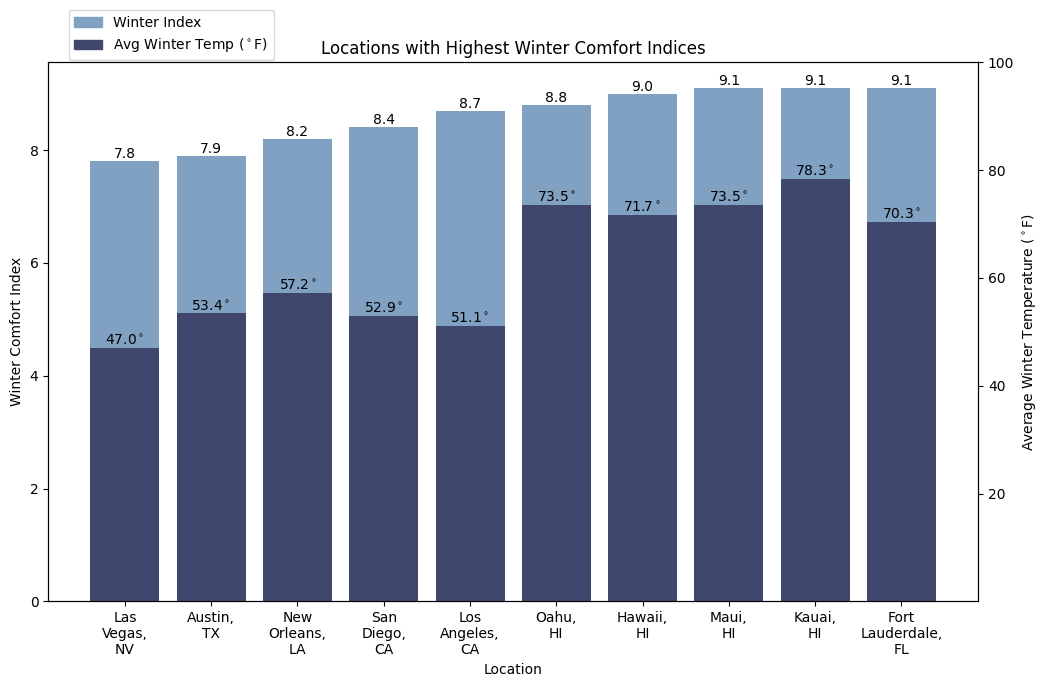

In [31]:
fig, ax = plt.subplots(figsize = (12,7))

winter_idx_plot = ax.bar(x=sum_win_idx_temps.sort_values('winter_comfort_index')['place'][-10:], height=sum_win_idx_temps.sort_values('winter_comfort_index')['winter_comfort_index'][-10:], color= '#80A1C1')
ax.bar_label(winter_idx_plot, labels=[round(score, 2) for score in sum_win_idx_temps.sort_values('winter_comfort_index')['winter_comfort_index'][-10:]], label_type='edge')
ax.set(title='Locations with Highest Winter Comfort Indices', xlabel='Location', ylabel='Winter Comfort Index', xticks=list(range(10)), xticklabels=[x.replace(' ', '\n') for x in sum_win_idx_temps.sort_values('winter_comfort_index')['place'][-10:]])

ax2 = ax.twinx()
summer_temp_plot = ax2.bar(x=sum_win_idx_temps.sort_values('winter_comfort_index')['place'][-10:], height=sum_win_idx_temps.sort_values('winter_comfort_index')['winter_avg_temp'][-10:], color='#40476D')
ax2.bar_label(summer_temp_plot, labels=[(str(round(degrees, 1)) + '$^\circ$') for degrees in sum_win_idx_temps.sort_values('winter_comfort_index')['winter_avg_temp'][-10:]], label_type='edge')
ax2.set(ylabel='Average Winter Temperature ($^\circ$F)', yticks=[20,40,60,80,100])
# ax2.set_ylabel('Average Summer Temperature (F)', rotation=90)

win_idx = mpatches.Patch(color='#80A1C1', label='Winter Index')
win_avg_temp = mpatches.Patch(color='#40476D', label='Avg Winter Temp ($^\circ$F)')
plt.legend(handles=[win_idx, win_avg_temp], bbox_to_anchor=(.25,1.11))

plt.show();

---
#### **Walkability**

In [32]:
walk = pd.read_csv('../datasets/cleaned_data/walkability_cleaned.csv') 

walk.head()

,place,state,auto_accss_idx,pct_no_vehicle,pct_one_or_more_vehicles,transit_accss_idx,walkability_idx
0,Asheville,NC,0.580614,0.053756,0.946244,0.149850,9.382035
1,Austin,TX,0.718323,0.059187,0.940813,0.286952,11.516379
2,Boston,MA,0.759096,0.301252,0.698748,0.409262,14.936791
3,Cambridge,MA,0.563985,0.102769,0.897231,0.160956,12.458517
4,Chicago,IL,0.636256,0.169022,0.830978,0.310866,13.635529


In [33]:
walk

,place,state,auto_accss_idx,pct_no_vehicle,pct_one_or_more_vehicles,transit_accss_idx,walkability_idx
0,Asheville,NC,0.580614,0.053756,0.946244,0.149850,9.382035
1,Austin,TX,0.718323,0.059187,0.940813,0.286952,11.516379
2,Boston,MA,0.759096,0.301252,0.698748,0.409262,14.936791
3,Cambridge,MA,0.563985,0.102769,0.897231,0.160956,12.458517
4,Chicago,IL,0.636256,0.169022,0.830978,0.310866,13.635529
5,Columbus,OH,0.744268,0.091023,0.908977,0.215170,11.556746
6,Dallas,TX,0.715059,0.068888,0.931112,0.134287,11.899341
7,Denver,CO,0.695461,0.088027,0.911973,0.340169,14.462231
8,Fort Lauderdale,FL,0.619619,0.072372,0.927628,0.082755,12.445745
9,Fort Worth,TX,0.545243,0.047143,0.952857,0.018406,9.585953


In [34]:
walk.sort_values('walkability_idx', ascending=False)

,place,state,auto_accss_idx,pct_no_vehicle,pct_one_or_more_vehicles,transit_accss_idx,walkability_idx
26,San Francisco,CA,0.515844,0.257812,0.742188,0.483650,15.957258
2,Boston,MA,0.759096,0.301252,0.698748,0.409262,14.936791
32,Washington DC,DC,0.826212,0.323116,0.676884,0.474512,14.471481
7,Denver,CO,0.695461,0.088027,0.911973,0.340169,14.462231
22,Portland,OR,0.565287,0.091617,0.908383,0.363953,14.395631
11,Jersey City,NJ,0.507707,0.308526,0.691474,0.151657,14.382772
21,Oakland,CA,0.612399,0.093714,0.906286,0.195285,14.138809
17,New Orleans,LA,0.751357,0.202709,0.797291,0.407869,13.797787
4,Chicago,IL,0.636256,0.169022,0.830978,0.310866,13.635529
14,Los Angeles,CA,0.571953,0.084190,0.915810,0.186849,13.572348


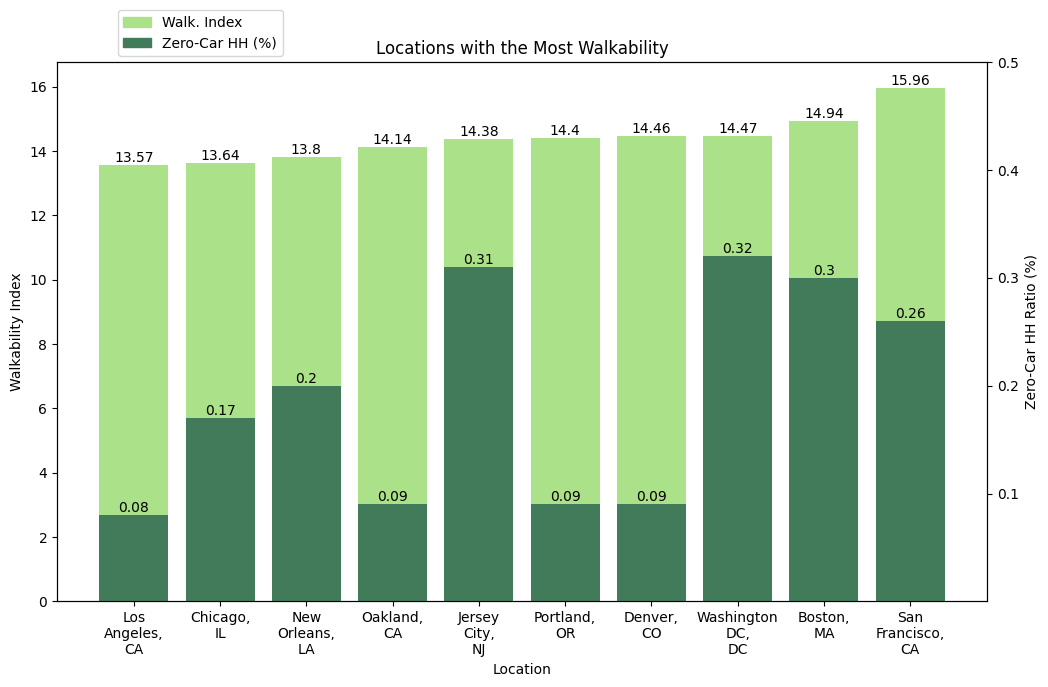

In [35]:
fig, ax = plt.subplots(figsize = (12,7))

high_walk = walk.sort_values('walkability_idx', ascending=False).head(10)
high_walk['place'] = high_walk[['place', 'state']].apply(lambda x: ', '.join(x), axis=1)

high_walk_plot = ax.bar(x = high_walk['place'][::-1], height= round(high_walk['walkability_idx'][::-1], 2), color='#ABE188')
ax.bar_label(high_walk_plot, label_type='edge')
ax.set(title='Locations with the Most Walkability', ylabel='Walkability Index', xlabel='Location', xticks=list(range(10)), xticklabels=[x.replace(' ', '\n') for x in high_walk['place'][::-1]])

# high_0_car_hh = walk.sort_values('pct_no_vehicle', ascending=False).head(10)
# high_0_car_hh['place'] = high_0_car_hh[['place', 'state']].apply(lambda x: ', '.join(x), axis=1)

ax2 = ax.twinx()
high_0_car_plot = ax2.bar(x = high_walk['place'][::-1], height= round(high_walk['pct_no_vehicle'][::-1], 2), color='#417B5A')
ax2.bar_label(high_0_car_plot, label_type='edge')
ax2.set(ylabel='Zero-Car HH Ratio (%)', yticks=[.1, .2, .3, .4, .5])

walk_idx = mpatches.Patch(color='#ABE188', label='Walk. Index')
no_car_hh = mpatches.Patch(color='#417B5A', label='Zero-Car HH (%)')
plt.legend(handles=[walk_idx, no_car_hh], bbox_to_anchor=(.25,1.11))

plt.show();

##### Which locations have the highest walkability indices?

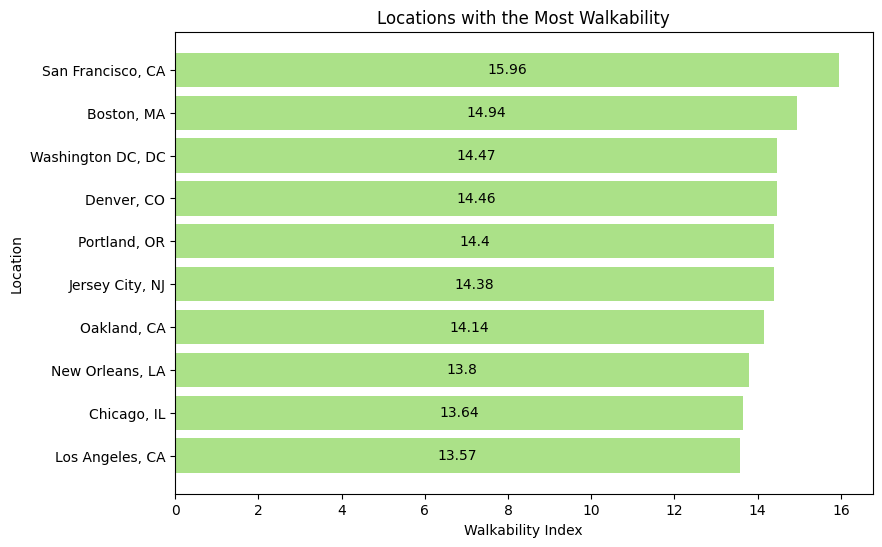

In [36]:
high_walk = walk.sort_values('walkability_idx', ascending=False).head(10)
high_walk['place'] = high_walk[['place', 'state']].apply(lambda x: ', '.join(x), axis=1)

fig, ax = plt.subplots(figsize = (9,6))

high_walk_plot = ax.barh(y = high_walk['place'][::-1], width= round(high_walk['walkability_idx'][::-1], 2), color='#ABE188')
ax.bar_label(high_walk_plot, label_type='center')
ax.set(title='Locations with the Most Walkability', xlabel='Walkability Index', ylabel='Location')
plt.show();

##### Which locations have the lowest walkability indices?

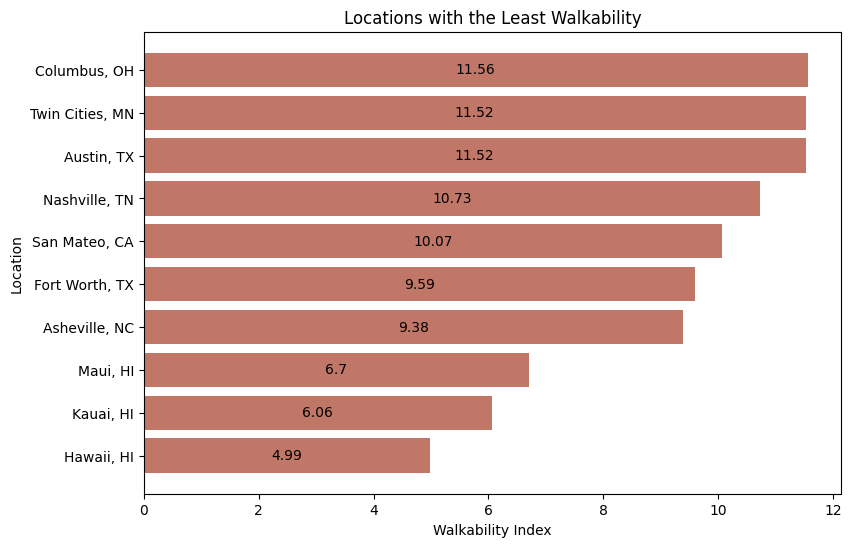

In [37]:
low_walk = walk.sort_values('walkability_idx', ascending=False).tail(10)
low_walk['place'] = low_walk[['place', 'state']].apply(lambda x: ', '.join(x), axis=1)

fig, ax = plt.subplots(figsize = (9,6))

low_walk_plot = ax.barh(y = low_walk['place'][::-1], width= round(low_walk['walkability_idx'][::-1], 2), color='#C17767')
ax.bar_label(low_walk_plot, label_type='center')
ax.set(title='Locations with the Least Walkability', xlabel='Walkability Index', ylabel='Location')
plt.show();

In [38]:
walk.sort_values('pct_no_vehicle', ascending=False)

,place,state,auto_accss_idx,pct_no_vehicle,pct_one_or_more_vehicles,transit_accss_idx,walkability_idx
18,New York City,NY,0.574644,0.486772,0.513228,0.323576,13.491196
32,Washington DC,DC,0.826212,0.323116,0.676884,0.474512,14.471481
11,Jersey City,NJ,0.507707,0.308526,0.691474,0.151657,14.382772
2,Boston,MA,0.759096,0.301252,0.698748,0.409262,14.936791
26,San Francisco,CA,0.515844,0.257812,0.742188,0.483650,15.957258
17,New Orleans,LA,0.751357,0.202709,0.797291,0.407869,13.797787
19,Newark,NJ,0.461071,0.198245,0.801755,0.051300,13.334575
4,Chicago,IL,0.636256,0.169022,0.830978,0.310866,13.635529
3,Cambridge,MA,0.563985,0.102769,0.897231,0.160956,12.458517
23,Rhode Island,RI,0.538557,0.096473,0.903527,0.209317,12.587935


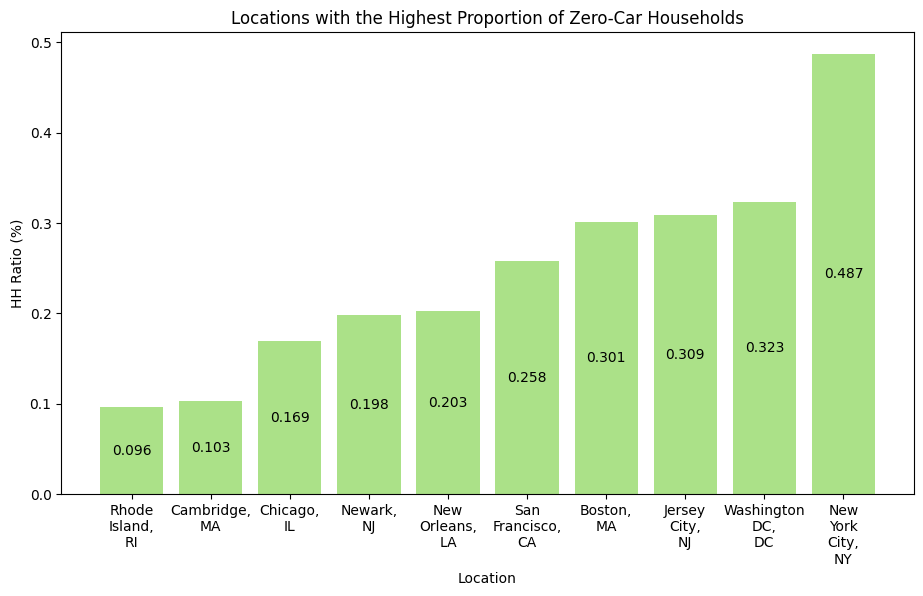

In [39]:
high_0_car_hh = walk.sort_values('pct_no_vehicle', ascending=False).head(10)
high_0_car_hh['place'] = high_0_car_hh[['place', 'state']].apply(lambda x: ', '.join(x), axis=1)

fig, ax = plt.subplots(figsize = (11,6))

high_0_car_plot = ax.bar(x = high_0_car_hh['place'][::-1], height= round(high_0_car_hh['pct_no_vehicle'][::-1], 3), color='#ABE188')
ax.bar_label(high_0_car_plot, label_type='center')
ax.set(title='Locations with the Highest Proportion of Zero-Car Households', xlabel='Location', xticks=list(range(10)), xticklabels=[x.replace(' ', '\n') for x in high_0_car_hh['place'][::-1]], ylabel='HH Ratio (%)')
plt.show();

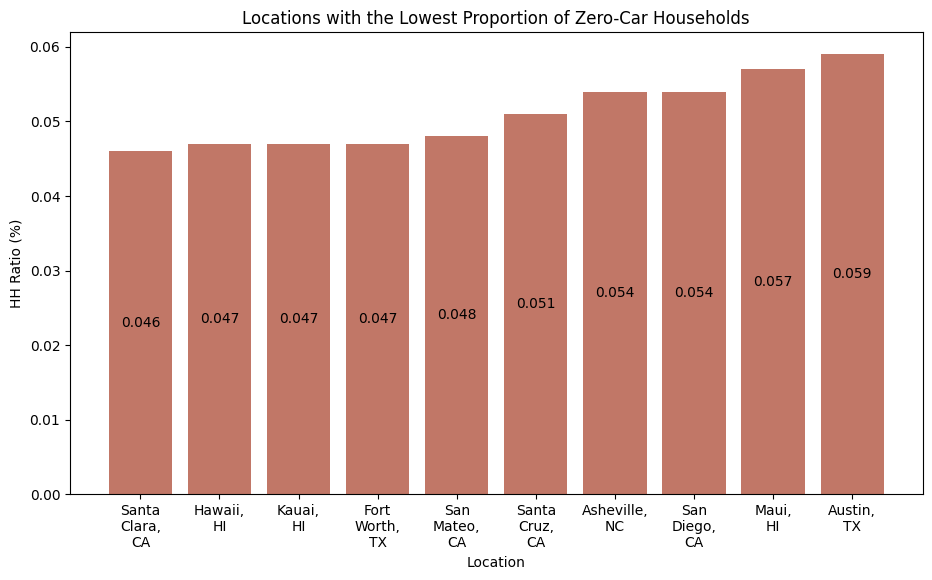

In [40]:
low_0_car_hh = walk.sort_values('pct_no_vehicle', ascending=False).tail(10)
low_0_car_hh['place'] = low_0_car_hh[['place', 'state']].apply(lambda x: ', '.join(x), axis=1)

fig, ax = plt.subplots(figsize = (11,6))

low_0_car_plot = ax.bar(x = low_0_car_hh['place'][::-1], height= round(low_0_car_hh['pct_no_vehicle'][::-1], 3), color='#C17767')
ax.bar_label(low_0_car_plot, label_type='center')
ax.set(title='Locations with the Lowest Proportion of Zero-Car Households', xlabel='Location', xticks=list(range(10)), xticklabels=[x.replace(' ', '\n') for x in low_0_car_hh['place'][::-1]], ylabel='HH Ratio (%)')
plt.show();

##### Do we see any notable trends when looking at walkability and cost of living metrics adjacently?

In [41]:
walk_coli = pd.merge(walk.rename(columns={'place': 'name'}), coli, on='name', how='outer', suffixes=(None, '_c'))
walk_coli.drop(columns='state_c', inplace=True)

walk_coli.head()

,name,state,auto_accss_idx,pct_no_vehicle,pct_one_or_more_vehicles,transit_accss_idx,walkability_idx,cost_of_living,grocery_cost_idx,transportation_cost_idx,miscellaneous_cost_idx,population,median_age,summer_comfort_index,winter_comfort_index,perc_growth_since_2020,political_left_lean,political_right_lean
0,Asheville,NC,0.580614,0.053756,0.946244,0.149850,9.382035,105.7,103.1,82.8,111.2,92852,38.6,8.5,6.0,0.090,0.597,0.386
1,Austin,TX,0.718323,0.059187,0.940813,0.286952,11.516379,129.4,96.7,109.9,105.9,995484,32.7,3.7,7.9,0.200,0.714,0.264
2,Boston,MA,0.759096,0.301252,0.698748,0.409262,14.936791,153.4,111.4,131.8,157.9,691531,32.0,9.1,4.9,0.110,0.806,0.175
3,Cambridge,MA,0.563985,0.102769,0.897231,0.160956,12.458517,173.7,115.5,95.7,176.7,119192,30.4,9.2,4.8,0.071,0.715,0.263
4,Chicago,IL,0.636256,0.169022,0.830978,0.310866,13.635529,107.4,97.2,138.5,139.8,2677643,34.1,9.0,4.7,0.007,0.742,0.240


In [42]:
walk_coli.corr()

,auto_accss_idx,pct_no_vehicle,pct_one_or_more_vehicles,transit_accss_idx,walkability_idx,cost_of_living,grocery_cost_idx,transportation_cost_idx,miscellaneous_cost_idx,population,median_age,summer_comfort_index,winter_comfort_index,perc_growth_since_2020,political_left_lean,political_right_lean
auto_accss_idx,1.000000,0.219954,-0.219954,0.578922,0.508171,-0.355498,-0.620698,-0.002423,0.103417,0.011782,-0.568876,-0.349337,-0.357282,0.393903,0.224126,-0.227866
pct_no_vehicle,0.219954,1.000000,-1.000000,0.533472,0.522762,0.121522,-0.076757,0.634006,0.231334,0.319582,-0.213021,0.057639,-0.341468,0.017830,0.476736,-0.452754
pct_one_or_more_vehicles,-0.219954,-1.000000,1.000000,-0.533472,-0.522762,-0.121522,0.076757,-0.634006,-0.231334,-0.319582,0.213021,-0.057639,0.341468,-0.017830,-0.476736,0.452754
transit_accss_idx,0.578922,0.533472,-0.533472,1.000000,0.754109,0.129949,-0.368034,0.364853,0.466140,0.134613,-0.278322,0.051975,-0.311636,0.263258,0.550032,-0.557582
walkability_idx,0.508171,0.522762,-0.522762,0.754109,1.000000,0.162805,-0.620989,0.642363,0.550736,0.223706,-0.432718,0.081363,-0.424168,0.049158,0.517694,-0.510747
cost_of_living,-0.355498,0.121522,-0.121522,0.129949,0.162805,1.000000,0.379796,0.440882,0.636123,0.137684,0.267526,0.449799,0.260857,-0.141079,0.453666,-0.455409
grocery_cost_idx,-0.620698,-0.076757,0.076757,-0.368034,-0.620989,0.379796,1.000000,-0.216108,-0.130872,-0.111330,0.597443,0.231413,0.507247,-0.171524,-0.022343,0.021107
transportation_cost_idx,-0.002423,0.634006,-0.634006,0.364853,0.642363,0.440882,-0.216108,1.000000,0.388993,0.554796,-0.083258,0.062695,-0.024709,-0.088197,0.477893,-0.453895
miscellaneous_cost_idx,0.103417,0.231334,-0.231334,0.466140,0.550736,0.636123,-0.130872,0.388993,1.000000,0.151029,-0.241504,0.531579,-0.322570,-0.121665,0.584322,-0.593056
population,0.011782,0.319582,-0.319582,0.134613,0.223706,0.137684,-0.111330,0.554796,0.151029,1.000000,-0.048572,0.155784,0.072271,-0.251900,0.015814,-0.004299


In [43]:
coli.corr()

,cost_of_living,grocery_cost_idx,transportation_cost_idx,miscellaneous_cost_idx,population,median_age,summer_comfort_index,winter_comfort_index,perc_growth_since_2020,political_left_lean,political_right_lean
cost_of_living,1.000000,0.379796,0.440882,0.636123,0.137684,0.267526,0.449799,0.260857,-0.141079,0.453666,-0.455409
grocery_cost_idx,0.379796,1.000000,-0.216108,-0.130872,-0.111330,0.597443,0.231413,0.507247,-0.171524,-0.022343,0.021107
transportation_cost_idx,0.440882,-0.216108,1.000000,0.388993,0.554796,-0.083258,0.062695,-0.024709,-0.088197,0.477893,-0.453895
miscellaneous_cost_idx,0.636123,-0.130872,0.388993,1.000000,0.151029,-0.241504,0.531579,-0.322570,-0.121665,0.584322,-0.593056
population,0.137684,-0.111330,0.554796,0.151029,1.000000,-0.048572,0.155784,0.072271,-0.251900,0.015814,-0.004299
median_age,0.267526,0.597443,-0.083258,-0.241504,-0.048572,1.000000,0.045299,0.558149,-0.281347,-0.148697,0.151523
summer_comfort_index,0.449799,0.231413,0.062695,0.531579,0.155784,0.045299,1.000000,-0.390266,-0.505867,0.217240,-0.237356
winter_comfort_index,0.260857,0.507247,-0.024709,-0.322570,0.072271,0.558149,-0.390266,1.000000,0.143271,-0.174024,0.179123
perc_growth_since_2020,-0.141079,-0.171524,-0.088197,-0.121665,-0.251900,-0.281347,-0.505867,0.143271,1.000000,0.240094,-0.246896
political_left_lean,0.453666,-0.022343,0.477893,0.584322,0.015814,-0.148697,0.217240,-0.174024,0.240094,1.000000,-0.998358


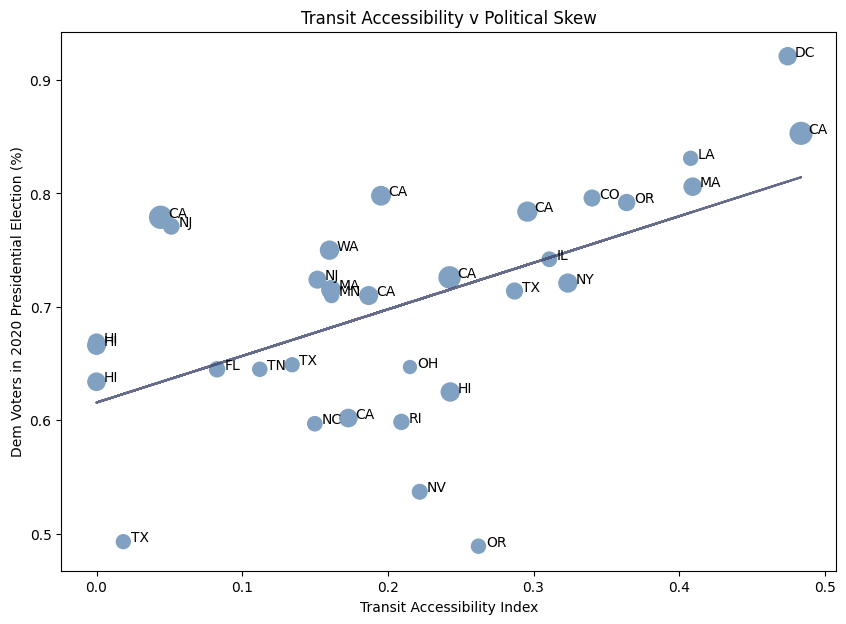

In [44]:
fig, ax = plt.subplots(figsize = (10,7))

# Adding points
ax.scatter(walk_coli['transit_accss_idx'], walk_coli['political_left_lean'], s=walk_coli['cost_of_living'], c='#80A1C1')

# Adding state abbreviation annotations
for i, (transit_accss, pol, state) in enumerate(zip(walk_coli['transit_accss_idx'], walk_coli['political_left_lean'], walk_coli['state'])):
    ax.annotate(state, (transit_accss +.005, pol))

# Plot titles and labeling
ax.set(title='Transit Accessibility v Political Skew', xlabel='Transit Accessibility Index', ylabel='Dem Voters in 2020 Presidential Election (%)')

# Plotting trendline
z = np.polyfit(walk_coli['transit_accss_idx'], walk_coli['political_left_lean'], 1)
p = np.poly1d(z)
plt.plot(walk_coli['transit_accss_idx'], p(walk_coli['transit_accss_idx']), color= '#40476D', alpha=0.8)

plt.show();

- Do places with greater transit accessibility tend to lean more left politically?

- Slight upward trend, with points sized relative to the cost of living in each location. Less obvious state/regional divisions.

In [45]:
# We saw above that many of the locations 

In [46]:
airbnb.groupby(['place', 'state'])['price'].mean()

place            state
Asheville        NC       225.830385
Austin           TX       436.273137
Boston           MA       272.879054
Cambridge        MA       246.035242
Chicago          IL       245.904608
Columbus         OH       170.467116
Dallas           TX       251.469035
Denver           CO       191.709444
Fort Lauderdale  FL       251.728745
Fort Worth       TX       181.312646
Hawaii           HI       355.600395
Jersey City      NJ       338.605172
Kauai            HI       472.192278
Las Vegas        NV       272.591786
Los Angeles      CA       353.322342
Maui             HI       657.568340
Nashville        TN       296.895013
New Orleans      LA       204.729702
New York City    NY       246.562270
Newark           NJ       210.133952
Oahu             HI       315.787603
Oakland          CA       189.111310
Portland         OR       152.798887
Rhode Island     RI       390.035861
Salem            OR       167.314607
San Diego        CA       375.109132
San Francisco  

In [47]:
walk_coli['miscellaneous_cost_idx']

0     111.20
1     105.90
2     157.90
3     176.70
4     139.80
5     107.50
6     107.80
7     152.20
8     107.60
9     109.20
10    103.00
11    112.90
12     92.90
13    109.70
14    133.20
15     95.30
16     99.90
17     97.70
18    137.90
19    109.90
20    124.00
21    158.50
22    140.10
23    121.18
24    103.60
25    152.90
26    162.60
27    161.20
28    158.40
29    155.60
30    150.70
31    143.40
32    168.00
Name: miscellaneous_cost_idx, dtype: float64

In [48]:
t = 12345678987654321

In [49]:
def adj_sum(num, digits):
  num = str(num)
  string_list = []
  int_list = []
  product_list = []
  for idx, chars in enumerate(num):
    num_slice = num[idx:idx + digits]
    string_list.append(num_slice)
  for num_str in string_list:
    for single_num in num_str:
      int_list.append([int(single_num) for single_num in num_str])
  for ints in int_list:
    prod = 1
    for nums in ints:
      prod *= nums
      product_list.append(prod)
  return sorted(product_list, reverse=True)[0]

In [50]:
def adj_sum(num, digits):
  num = str(num)
  string_list = []
  int_list = []
  product_list = []
  for idx, chars in enumerate(num):
    num_slice = num[idx:idx + digits]
    string_list.append(num_slice)
#   prod = 1
#   for i in list(range(digits)):
#     for string_num in string_list:
#         prod *= int(string_num[1])
  print(string_list)

In [51]:
range(2)

range(0, 2)

In [52]:
adj_sum(t, 2)

['12', '23', '34', '45', '56', '67', '78', '89', '98', '87', '76', '65', '54', '43', '32', '21', '1']


In [53]:
walk_coli

,name,state,auto_accss_idx,pct_no_vehicle,pct_one_or_more_vehicles,transit_accss_idx,walkability_idx,cost_of_living,grocery_cost_idx,transportation_cost_idx,miscellaneous_cost_idx,population,median_age,summer_comfort_index,winter_comfort_index,perc_growth_since_2020,political_left_lean,political_right_lean
0,Asheville,NC,0.580614,0.053756,0.946244,0.149850,9.382035,105.70,103.10,82.80,111.20,92852,38.6,8.5,6.0,0.0900,0.5970,0.3860
1,Austin,TX,0.718323,0.059187,0.940813,0.286952,11.516379,129.40,96.70,109.90,105.90,995484,32.7,3.7,7.9,0.2000,0.7140,0.2640
2,Boston,MA,0.759096,0.301252,0.698748,0.409262,14.936791,153.40,111.40,131.80,157.90,691531,32.0,9.1,4.9,0.1100,0.8060,0.1750
3,Cambridge,MA,0.563985,0.102769,0.897231,0.160956,12.458517,173.70,115.50,95.70,176.70,119192,30.4,9.2,4.8,0.0710,0.7150,0.2630
4,Chicago,IL,0.636256,0.169022,0.830978,0.310866,13.635529,107.40,97.20,138.50,139.80,2677643,34.1,9.0,4.7,0.0070,0.7420,0.2400
5,Columbus,OH,0.744268,0.091023,0.908977,0.215170,11.556746,86.40,98.80,90.10,107.50,903852,32.2,8.8,5.1,0.1060,0.6470,0.3340
6,Dallas,TX,0.715059,0.068888,0.931112,0.134287,11.899341,101.00,99.10,117.10,107.80,1343266,32.5,3.7,7.5,0.0950,0.6490,0.3330
7,Denver,CO,0.695461,0.088027,0.911973,0.340169,14.462231,127.80,101.90,116.10,152.20,735538,34.4,8.8,5.6,0.1740,0.7960,0.1820
8,Fort Lauderdale,FL,0.619619,0.072372,0.927628,0.082755,12.445745,118.50,107.60,130.80,107.60,184245,42.2,2.3,9.1,0.0590,0.6450,0.3470
9,Fort Worth,TX,0.545243,0.047143,0.952857,0.018406,9.585953,100.20,97.70,113.90,109.20,927720,32.2,4.0,7.6,0.1840,0.4930,0.4910


---
#### **Experimental EDA - Do we see any notable trends when looking at all of our metrics adjacently?**
In order to plot as efficiently as possible, we'll be combining all of the above dataframes into one large table.

In [61]:
all_feats = pd.concat([pd.DataFrame(airbnb.groupby(['place', 'state'])['price'].mean()).reset_index(), walk_coli.iloc[:, 2:], chain_ratios_df.iloc[:, -1:], weather.iloc[:, 2:]], axis=1)
all_feats.to_csv('../datasets/cleaned_data/all_features.csv', index=False)
all_feats

,place,state,price,auto_accss_idx,pct_no_vehicle,pct_one_or_more_vehicles,transit_accss_idx,walkability_idx,cost_of_living,grocery_cost_idx,...,nov_avg_rain,dec_avg_rain,winter_avg_temp,spring_avg_temp,summer_avg_temp,autumn_avg_temp,winter_avg_rain,spring_avg_rain,summer_avg_rain,autumn_avg_rain
0,Asheville,NC,225.830385,0.580614,0.053756,0.946244,0.149850,9.382035,105.70,103.10,...,3.110,3.690000,40.166667,53.333333,70.200000,55.333333,3.710000,4.160000,4.713333,3.423333
1,Austin,TX,436.273137,0.718323,0.059187,0.940813,0.286952,11.516379,129.40,96.70,...,2.520,2.420000,53.400000,67.433333,82.333333,70.366667,2.243333,3.256667,2.386667,3.026667
2,Boston,MA,272.879054,0.759096,0.301252,0.698748,0.409262,14.936791,153.40,111.40,...,4.040,4.010000,33.100000,49.700000,72.233333,56.000000,3.810000,3.790000,3.463333,3.703333
3,Cambridge,MA,246.035242,0.563985,0.102769,0.897231,0.160956,12.458517,173.70,115.50,...,4.000,3.850000,31.100000,49.166667,71.633333,54.533333,3.570000,3.706667,3.523333,3.676667
4,Chicago,IL,245.904608,0.636256,0.169022,0.830978,0.310866,13.635529,107.40,97.20,...,2.440,2.040000,28.133333,50.833333,73.933333,55.766667,1.760000,3.223333,3.643333,2.853333
5,Columbus,OH,170.467116,0.744268,0.091023,0.908977,0.215170,11.556746,86.40,98.80,...,2.740,2.740000,32.866667,52.800000,74.100000,56.733333,2.640000,3.646667,3.846667,2.653333
6,Dallas,TX,251.469035,0.715059,0.068888,0.931112,0.134287,11.899341,101.00,99.10,...,2.840,2.700000,49.566667,64.800000,82.666667,68.900000,2.453333,3.973333,2.633333,3.090000
7,Denver,CO,191.709444,0.695461,0.088027,0.911973,0.340169,14.462231,127.80,101.90,...,0.680,0.550000,33.166667,47.200000,73.466667,55.600000,0.480000,1.796667,1.753333,0.973333
8,Fort Lauderdale,FL,251.728745,0.619619,0.072372,0.927628,0.082755,12.445745,118.50,107.60,...,2.760,1.920000,70.300000,75.933333,82.533333,77.633333,2.060000,3.703333,7.463333,5.786667
9,Fort Worth,TX,181.312646,0.545243,0.047143,0.952857,0.018406,9.585953,100.20,97.70,...,2.400,2.230000,49.166667,64.100000,82.133333,68.533333,2.086667,3.680000,2.576667,2.826667


##### Miscellaneous Cost Index refers to goods and services like clothing, restaurants, and entertainment - all of which would, we believe, lead to increased tourism/Airbnb demand. Is there a relationship between the MCI and average Airbnb prices?

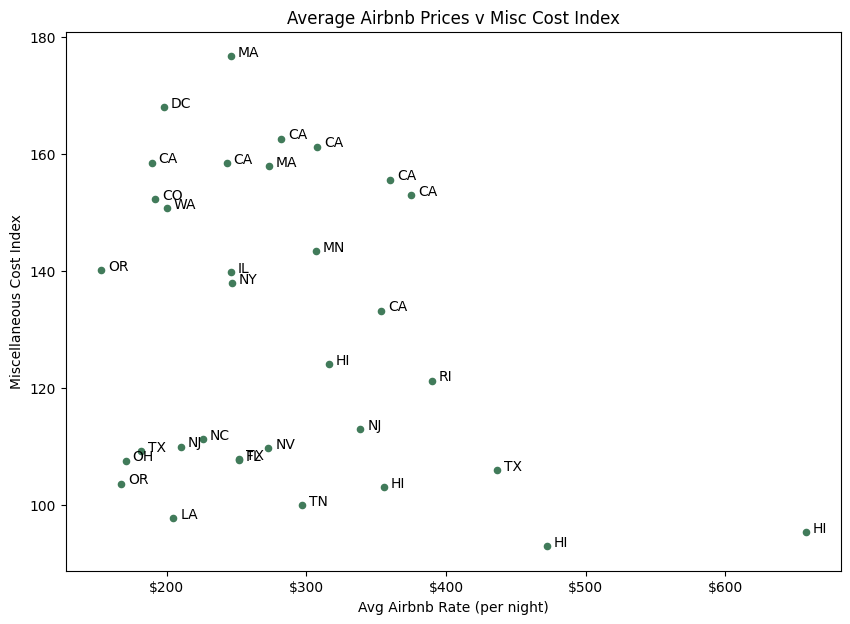

In [55]:
fig, ax = plt.subplots(figsize = (10,7))

ax.scatter(all_feats['price'], all_feats['miscellaneous_cost_idx'], s=20, c='#417B5A')

for i, (price, misc_costs, state) in enumerate(zip(all_feats['price'], all_feats['miscellaneous_cost_idx'], all_feats['state'])):
    ax.annotate(state, (price + 5, misc_costs))

ax.set(title='Average Airbnb Prices v Misc Cost Index', xlabel='Avg Airbnb Rate (per night)', xticks=[200, 300, 400, 500, 600], xticklabels=['$200', '$300', '$400', '$500', '$600'], ylabel='Miscellaneous Cost Index')

plt.show();

- No linear relationship, but somewhat of a divide seen along the y-axis, meaning that there is a split along the miscellaneous cost index.

##### Similar to our prior cost of living/political skew plot, is there a relationship between a location's chain ratio and political preferences?

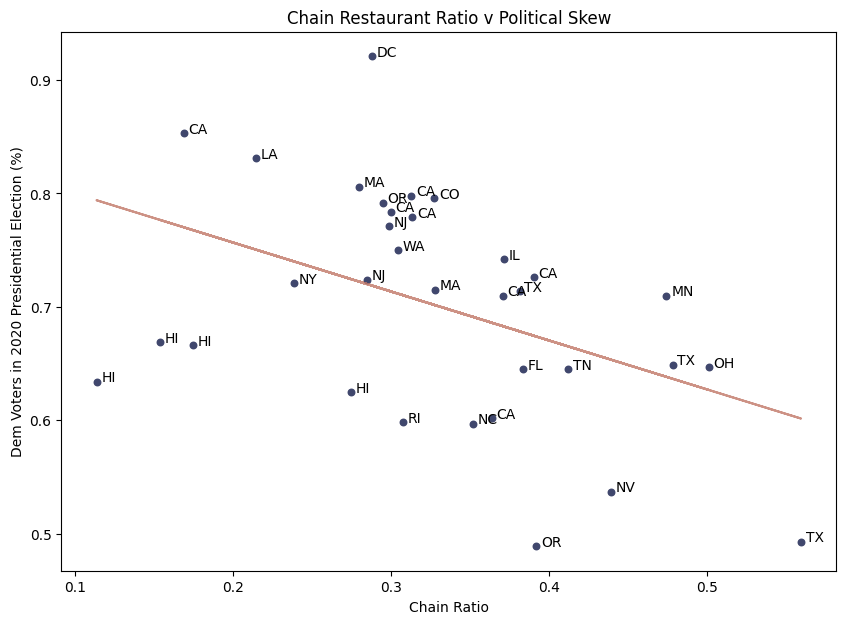

In [56]:
fig, ax = plt.subplots(figsize = (10,7))

# Adding points
ax.scatter(all_feats['chain_ratio'], all_feats['political_left_lean'], s=22, c='#40476D')

# Adding state abbreviation annotations
for i, (col, pol, state) in enumerate(zip(all_feats['chain_ratio'], all_feats['political_left_lean'], all_feats['state'])):
    ax.annotate(state, (col +.003, pol))

# Plot titles and labeling
ax.set(title='Chain Restaurant Ratio v Political Skew', xlabel='Chain Ratio', ylabel='Dem Voters in 2020 Presidential Election (%)')

# Plotting trendline
z = np.polyfit(all_feats['chain_ratio'], all_feats['political_left_lean'], 1)
p = np.poly1d(z)
plt.plot(all_feats['chain_ratio'], p(all_feats['chain_ratio']), color= '#C17767', alpha=0.8)

plt.show();

#### Are there more chain restaurants in locations where the grocery cost index is higher?

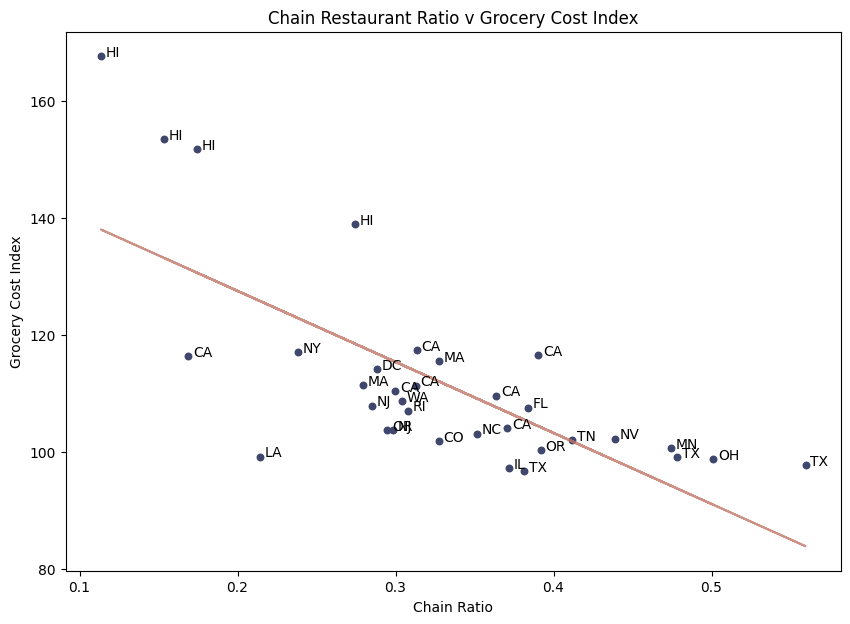

In [57]:
fig, ax = plt.subplots(figsize = (10,7))

# Adding points
ax.scatter(all_feats['chain_ratio'], all_feats['grocery_cost_idx'], s=22, c='#40476D')

# Adding state abbreviation annotations
for i, (col, pol, state) in enumerate(zip(all_feats['chain_ratio'], all_feats['grocery_cost_idx'], all_feats['state'])):
    ax.annotate(state, (col +.003, pol))

# Plot titles and labeling
ax.set(title='Chain Restaurant Ratio v Grocery Cost Index', xlabel='Chain Ratio', ylabel='Grocery Cost Index')

# Plotting trendline
z = np.polyfit(all_feats['chain_ratio'], all_feats['grocery_cost_idx'], 1)
p = np.poly1d(z)
plt.plot(all_feats['chain_ratio'], p(all_feats['chain_ratio']), color= '#C17767', alpha=0.8)

plt.show();

In [58]:
all_feats.corr()

,price,auto_accss_idx,pct_no_vehicle,pct_one_or_more_vehicles,transit_accss_idx,walkability_idx,cost_of_living,grocery_cost_idx,transportation_cost_idx,miscellaneous_cost_idx,...,nov_avg_rain,dec_avg_rain,winter_avg_temp,spring_avg_temp,summer_avg_temp,autumn_avg_temp,winter_avg_rain,spring_avg_rain,summer_avg_rain,autumn_avg_rain
price,1.000000,-0.405931,-0.197082,0.197082,-0.377829,-0.537631,0.199535,0.602184,-0.251437,-0.273840,...,-0.234133,-0.168994,0.524498,0.517105,0.288885,0.562553,-0.180188,-0.345618,-0.238260,-0.295792
auto_accss_idx,-0.405931,1.000000,0.219954,-0.219954,0.578922,0.508171,-0.355498,-0.620698,-0.002423,0.103417,...,-0.089510,-0.151883,-0.431721,-0.252156,0.165570,-0.293055,-0.148372,0.245408,0.331162,0.070846
pct_no_vehicle,-0.197082,0.219954,1.000000,-1.000000,0.533472,0.522762,0.121522,-0.076757,0.634006,0.231334,...,0.006447,-0.035708,-0.308580,-0.248913,-0.031443,-0.223233,-0.042617,0.215818,0.335033,0.141082
pct_one_or_more_vehicles,0.197082,-0.219954,-1.000000,1.000000,-0.533472,-0.522762,-0.121522,0.076757,-0.634006,-0.231334,...,-0.006447,0.035708,0.308580,0.248913,0.031443,0.223233,0.042617,-0.215818,-0.335033,-0.141082
transit_accss_idx,-0.377829,0.578922,0.533472,-0.533472,1.000000,0.754109,0.129949,-0.368034,0.364853,0.466140,...,0.083097,0.114534,-0.357922,-0.390947,-0.270909,-0.385090,0.140282,0.047105,-0.019907,-0.004302
walkability_idx,-0.537631,0.508171,0.522762,-0.522762,0.754109,1.000000,0.162805,-0.620989,0.642363,0.550736,...,0.078305,0.076546,-0.544206,-0.571373,-0.317351,-0.541889,0.116877,0.075110,0.042678,0.055210
cost_of_living,0.199535,-0.355498,0.121522,-0.121522,0.129949,0.162805,1.000000,0.379796,0.440882,0.636123,...,-0.014148,0.194880,0.225037,-0.046304,-0.493867,0.031285,0.272344,-0.403399,-0.584208,-0.329850
grocery_cost_idx,0.602184,-0.620698,-0.076757,0.076757,-0.368034,-0.620989,0.379796,1.000000,-0.216108,-0.130872,...,-0.035263,0.036582,0.689627,0.587122,0.151935,0.616820,-0.010256,-0.309070,-0.256022,-0.145107
transportation_cost_idx,-0.251437,-0.002423,0.634006,-0.634006,0.364853,0.642363,0.440882,-0.216108,1.000000,0.388993,...,-0.056380,0.001270,-0.157282,-0.216538,-0.154689,-0.158135,0.056811,-0.104973,-0.073205,-0.077492
miscellaneous_cost_idx,-0.273840,0.103417,0.231334,-0.231334,0.466140,0.550736,0.636123,-0.130872,0.388993,1.000000,...,-0.027286,0.061777,-0.408245,-0.571280,-0.614083,-0.502238,0.128148,-0.253812,-0.343119,-0.231064


In [59]:
sns.heatmap(test3.iloc[:, :-33].corr())

NameError: name 'test3' is not defined

In [ ]:
[city[:-4] for city in chain_ratios_df['city']]

['Asheville',
 'Austin',
 'Boston',
 'Cambridge',
 'Chicago',
 'Columbus',
 'Dallas',
 'Denver',
 'Fort Lauderdale',
 'Fort Worth',
 'Hawaii',
 'Jersey City',
 'Kauai',
 'Las Vegas',
 'Los Angeles',
 'Maui',
 'Nashville',
 'New Orleans',
 'New York City',
 'Newark',
 'Oahu',
 'Oakland',
 'Portland',
 'Rhode Island',
 'Salem',
 'San Diego',
 'San Francisco',
 'San Mateo',
 'Santa Clara',
 'Santa Cruz',
 'Seattle',
 'Twin Cities',
 'Washington DC']

In [ ]:
chain_ratios_df['city'] = [city[:-4] for city in chain_ratios_df['city']]

In [ ]:
coli.sort_values('name').reset_index(drop=True)

,name,state,cost_of_living,grocery_cost_idx,transportation_cost_idx,miscellaneous_cost_idx,population,median_age,summer_comfort_index,winter_comfort_index,perc_growth_since_2020,political_left_lean,political_right_lean
0,Asheville,NC,105.70,103.10,82.80,111.20,92852,38.6,8.5,6.0,0.0900,0.5970,0.3860
1,Austin,TX,129.40,96.70,109.90,105.90,995484,32.7,3.7,7.9,0.2000,0.7140,0.2640
2,Boston,MA,153.40,111.40,131.80,157.90,691531,32.0,9.1,4.9,0.1100,0.8060,0.1750
3,Cambridge,MA,173.70,115.50,95.70,176.70,119192,30.4,9.2,4.8,0.0710,0.7150,0.2630
4,Chicago,IL,107.40,97.20,138.50,139.80,2677643,34.1,9.0,4.7,0.0070,0.7420,0.2400
5,Columbus,OH,86.40,98.80,90.10,107.50,903852,32.2,8.8,5.1,0.1060,0.6470,0.3340
6,Dallas,TX,101.00,99.10,117.10,107.80,1343266,32.5,3.7,7.5,0.0950,0.6490,0.3330
7,Denver,CO,127.80,101.90,116.10,152.20,735538,34.4,8.8,5.6,0.1740,0.7960,0.1820
8,Fort Lauderdale,FL,118.50,107.60,130.80,107.60,184245,42.2,2.3,9.1,0.0590,0.6450,0.3470
9,Fort Worth,TX,100.20,97.70,113.90,109.20,927720,32.2,4.0,7.6,0.1840,0.4930,0.4910


In [ ]:
chain_ratios_df

ischain_y_n,city,state,No,Yes,chain_ratio
0,Asheville,NC,557,302,0.3516
1,Austin,TX,2173,1340,0.3814
2,Boston,MA,1997,775,0.2796
3,Cambridge,MA,2478,1208,0.3277
4,Chicago,IL,8377,4955,0.3717
5,Columbus,OH,1441,1448,0.5012
6,Dallas,TX,3040,2787,0.4783
7,Denver,CO,1637,797,0.3274
8,Fort Lauderdale,FL,2883,1795,0.3837
9,Fort Worth,TX,1874,2380,0.5595


In [ ]:
econ = pd.read_csv('../datasets/cleaned_data/metro_type.csv')

econ

,name,state,metro_status,recreation_status,low_employment,retirement_dest_status
0,Asheville,NC,1,0,0,0
1,Austin,TX,1,0,0,0
2,Boston,MA,1,0,0,0
3,Cambridge,MA,1,0,0,0
4,Chicago,IL,1,0,0,0
5,Columbus,OH,1,0,0,0
6,Dallas,TX,1,0,0,0
7,Denver,CO,1,0,0,0
8,Fort Lauderdale,FL,1,0,0,0
9,Fort Worth,TX,1,0,0,0
